In [126]:
%%time
%matplotlib inline
%run Prosser_header.py

dataset_folder = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\datasets\\"
output_folder  = "C:\\Users\\Marios\\Documents\\GitHub\\Thomas Prosser project\\output\\"

Toggle code

Wall time: 9 ms


In [127]:
df_merged = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "df_merged.zip",compression='zip')

In [128]:
partyfacts_core_parties_newest = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+"Newest version"+os.sep+"partyfacts-core-parties.csv")
partyfacts_external_parties_newest = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+"Newest version"+os.sep+ "partyfacts-external-parties.csv")
partyfacts_countries = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-countries.csv")
partyfacts_datasets = pd.read_csv(dataset_folder+"PartyFacts"+os.sep+ "partyfacts-datasets.csv")

In [225]:
df = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "df.zip",compression='zip')

In [231]:
# df_merged = df_means.merge( parlgov_party, how='left', on= "partyfacts_id")
# df_merged = df_merged.merge( pf_core, how='left', on= "partyfacts_id")


# ##################

# mask = merged_vl.apply(lambda x: x["type"] in ['man_cod', 'dummy_vars', 'expert_op', 'id_dim', 'elec_vars',
#        'coder_ratings', ],axis=1)

# reasonable_columns = [x for x in df_merged.columns if x in merged_vl["integrated_variable"][mask].values]
# reasonable_columns = reasonable_colums + ['(pimpo)totals', '(pimpo)totals_immi', '(pimpo)totals_inti', '(manifesto)total','partyfacts_id']

# df_merged = df_merged[reasonable_columns].copy()
# df_merged["partyfacts_id"] = df_merged_small["partyfacts_id"].astype(int)
# df_merged = df_merged_small.set_index("partyfacts_id")

In [267]:
## bit crude, but gets us the shape we want
df = df[df["partyfacts_id"].notnull()]
df["partyfacts_id"] = df["partyfacts_id"].astype(int)
party_year = df.groupby(["partyfacts_id","year",]).first()
party_year.notnull().sum().sum()

# first notnulls = 1420843
# mean notnulls = 1277982

1420843

In [1589]:
# party_year

In [287]:
cses_party_level_dataset = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"party_resp.pkl")


# cses_party_level_dataset = cses_party_level_dataset.rename(columns = {"ELECTION YEAR":"year"})
cses_party_level_dataset

,IMD5003_NUM,IMD5002_NUM,IMD5001_NUM,IMD5005_NUM,IMD5012_NUM,IMD5029_NUM,IMD5031_NUM,IMD5004_NUM,IMD5011_1. ECOLOGY PARTIES,IMD5011_10. NATIONAL PARTIES,...,IMD3007_STD_SAM,IMD3007_CNT_SAM,IMD3007_MEAN_DEM,IMD3007_STD_DEM,IMD3007_CNT_DEM,IMD3007_MEAN_POL,IMD3007_STD_POL,IMD3007_CNT_POL,year,partyfacts_id
0,NaN,40.000000,44.060001,NaN,6.0,0.0,12.0,NaN,0,0,...,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,2005,190
1,32.720001,43.849998,37.400002,NaN,4.0,21.0,0.0,54.169998,0,0,...,4.759513,1389.0,4.759513,4.759513,1389.0,4.759513,4.759513,1389.0,2015,2530
2,36.099998,33.099998,38.700001,NaN,4.5,NaN,NaN,38.099998,0,0,...,5.017643,1747.0,5.017643,5.017643,1747.0,5.017643,5.017643,1747.0,1996,424
3,43.369999,50.000000,40.470001,NaN,6.0,14.0,14.0,45.000000,0,0,...,6.126674,1718.0,6.126674,6.126674,1718.0,6.126674,6.126674,1718.0,2004,1998
4,40.299999,55.330002,43.380001,NaN,3.0,0.0,21.0,45.000000,0,0,...,5.367001,1803.0,5.244278,5.244278,1803.0,5.367001,5.367001,1803.0,2007,424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,NaN,NaN,NaN,0.76,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,7409
1266,NaN,0.000000,4.940000,NaN,8.0,0.0,0.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,63
1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,1240
1268,NaN,0.000000,3.120000,NaN,2.0,0.0,0.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,1240


In [293]:
# party_year[cses_party_level_dataset.columns] = np.nan
# cses_party_level_dataset.dtypes
party_year = party_year.reset_index().merge(cses_party_level_dataset,how= 'outer', on = ["partyfacts_id","year"])

In [292]:
party_year.shape, cses_party_level_dataset.shape

((7299, 1252), (1270, 45))

In [297]:
party_year.columns[0:50]

Index(['partyfacts_id', 'year', '(ches)eumember', 'country', '(ches)expert',
       '(ches)party_id', '(ches)party', '(ches)vote', '(ches)family',
       '(ches)eu_position', '(ches)future', '(ches)eu_ep', '(ches)eu_fiscal',
       '(ches)eu_employ', '(ches)eu_cohesion', '(ches)eu_environ',
       '(ches)eu_asylum', '(ches)eu_foreign', '(ches)lrgen', '(ches)lrecon',
       '(ches)galtan', '(ches)source', '(ches)govt', '(ches)partyname1',
       '(ches)partyname2', '(ches)vote1', '(ches)eu_intmark', '(ches)eu_agri',
       '(ches)enlargw', '(ches)enlarge', '(ches)eu_ep_dissent',
       '(ches)eu_intmark_dissent', '(ches)eu_employ_dissent',
       '(ches)eu_agri_dissent', '(ches)eu_cohesion_dissent',
       '(ches)eu_environ_dissent', '(ches)eu_asylum_dissent',
       '(ches)enlargw_dissent', '(ches)enlarge_dissent', '(ches)lrgen_sd',
       '(ches)lrecon_sd', '(ches)galtan_sd', '(ches)intgroup', '(ches)epgroup',
       '(ches)govt1', '(ches)govt2', '(ches)govt3', '(ches)eu_turkey',
    

In [248]:
temp = df.groupby(["partyfacts_id","year"]).count()
temp2 = temp[(temp>1).any(axis=1)]
(temp2>1).sum().sort_values(ascending=False).head(50)

dataset                                                         3600
country                                                         3600
dataset_index                                                   3600
edate                                                           3206
(pip)Unique ID for each observation (ISO.Quarter.Party)           85
(pip)Numeric country code (ISO)                                   85
(pip)Index Jahn: LR (Unstandardized)                              85
(pip)Index Jahn: LR Plus Importance                               85
(pip)Index Jahn: LR Plus                                          85
(pip)Index Jahn: LR Core Importance                               85
(pip)Index Jahn: LR Importance                                    85
(pip)Index Jahn: LR                                               85
(pip)party abbreviation                                           85
(pip)Name of party (english)                                      85
(pip)Index Jahn: LR Core (Unstanda

In [298]:
output_df_mean = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"respond_sample_broad_mean.pkl")
output_df_count = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"respond_sample_broad_count.pkl")
output_df_std = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"respond_sample_broad_std.pkl")

In [299]:
output_df_mean

,partyfacts_id,year,IMD1014_1_NUM,IMD2001_1_NUM,IMD1014_2_NUM,IMD3008_G_ORD,IMD3015_1_ORD,IMD3007_A_ORD,IMD3003_UH_ORD,IMD3015_4_ORD,...,IMD1016_1_1. FACE-TO-FACE,IMD1016_1_2. TELEPHONE,IMD1016_1_3. MAIL OR SELF-COMPLETED SUPPLEMENT,IMD1016_1_4. INTERNET,IMD2004_1. MARRIED OR LIVING TOGETHER AS MARRIED,IMD2004_2. WIDOWED,IMD2004_3. DIVORCED OR SEPARATED (MARRIED BUT SEPARATED/NOT LIVING WITH LEGAL SPOUSE),"IMD2004_4. SINGLE, NEVER MARRIED",IMD2002_1. MALE,IMD2002_2. FEMALE
0,3,1996,24.260324,53.434588,NaN,NaN,0.893517,6.078194,NaN,NaN,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.452484,0.547516
1,3,2004,27.631399,53.612248,NaN,NaN,0.750531,4.972476,NaN,NaN,...,1.0,0.0,0.0,0.0,0.678913,0.014731,0.019801,0.286555,0.378998,0.621002
2,3,2007,35.496883,60.375000,NaN,NaN,0.951423,4.729167,NaN,NaN,...,1.0,0.0,0.0,0.0,0.722306,0.070641,0.016702,0.190351,0.481087,0.518913
3,3,2013,14.268184,40.065563,NaN,NaN,0.930836,4.181903,NaN,NaN,...,1.0,0.0,0.0,0.0,0.772727,0.136364,0.045455,0.045455,0.500000,0.500000
4,4,2002,43.426124,42.582861,NaN,3.250000,0.712075,3.108154,NaN,NaN,...,1.0,0.0,0.0,0.0,0.241547,0.038930,0.068399,0.651124,0.601636,0.398364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,8262,2008,14.000000,47.000000,NaN,9.000000,1.000000,7.000000,NaN,NaN,...,1.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1436,8266,2002,35.369707,43.026282,NaN,3.444602,0.452718,5.436444,NaN,NaN,...,1.0,0.0,0.0,0.0,0.593350,0.161125,0.094629,0.148338,0.383632,0.616368
1437,8268,1997,124.674971,48.147087,NaN,NaN,NaN,4.325212,NaN,NaN,...,1.0,0.0,0.0,0.0,0.653873,0.080624,0.041175,0.224328,0.473013,0.526987
1438,8268,2001,215.125155,48.213483,NaN,NaN,NaN,5.690701,NaN,NaN,...,1.0,0.0,0.0,0.0,0.786816,0.062088,0.010478,0.140618,0.479801,0.520199


In [130]:
# partyfacts_core_parties_newest[partyfacts_core_parties_newest["name_short"].apply(lambda x: len(x)>10 if pd.notnull(x) else False)]


# hmm - sometimes abbreviations are 15 characters long!

In [131]:
partyfacts_core_parties_newest[partyfacts_core_parties_newest["name_short"].isnull()]

# 5307: Kokumin Kyōkai: no abbreviation - but "KK" seems to be free!
# 7619: National Alliance : "NA"
# 8081: National Union: "NU"??? (could be NA, but more distinct from National Alliance)
# 8454: Nauru First: No abbreviation ... because only party in Nauru I guess should be "NA" because name in Nauru?

partyfacts_core_parties_newest.loc[partyfacts_core_parties_newest["partyfacts_id"]==5307,"name_short"] = "KK"
partyfacts_core_parties_newest.loc[partyfacts_core_parties_newest["partyfacts_id"]==7619,"name_short"] = "NA"
partyfacts_core_parties_newest.loc[partyfacts_core_parties_newest["partyfacts_id"]==8081,"name_short"] = "NU"
partyfacts_core_parties_newest.loc[partyfacts_core_parties_newest["partyfacts_id"]==8454,"name_short"] = "NA"


In [132]:
search(output_df_mean,"IMD2006")

IMD2006_ORD    537
dtype: int64

In [133]:


party_colour_dict = {'eco ecologist':'green', 'lef socialist or other left':'pink', 'soc social democratic':'red',
       'lib liberal':'orange', 'chr christian democrat':'darkblue', 'con conservative':'lightblue',
       'nat nationalist':'purple', 'agr agrarian':'brown', 'eth ethnic-regional':'yellow',
       'sip special issue':'olive'}



In [134]:
manifesto_redist = df_merged[["(manifesto)per"+x for x in ["404","405","409","413","504","701"]]].sum(axis=1)

In [135]:
party_family = df_merged[search(df_merged,"\(manifesto\)family").index].idxmax(axis=1).apply(lambda x: x.replace("(manifesto)family__","") if pd.notnull(x) else np.nan)

In [136]:
mean_inc_decile = output_df_mean["IMD2006_ORD"]

In [137]:
abbreviation = partyfacts_core_parties_newest.set_index("partyfacts_id")["name_short"]

In [138]:
ss_inc_decile = output_df_count["IMD2006_ORD"]
ss_inc_decile.dropna()[ss_inc_decile.dropna()>100]

mean_inc_decile[ss_inc_decile<100] = np.nan
mean_inc_decile.dropna().shape

(239,)

In [139]:
party_overlap = set(manifesto_redist.dropna().index).intersection(mean_inc_decile.dropna().index)

# 562 by income -> 405 by income + redist
# with ss >=100, 243 -> 208

In [302]:
df =pd.DataFrame()
df["Support For Redistribution"] = manifesto_redist.loc[party_overlap]
df["Support Base Affluence"] = mean_inc_decile.loc[party_overlap]
df["Abbreviation"] = abbreviation.loc[party_overlap]
df["Party Family"] = party_family.loc[party_overlap]
# 29 missing party family values
df["Party Family"] = df["Party Family"].fillna("unknown").astype('category')

In [141]:
df.notnull().sum()

Support For Redistribution    206
Support Base Affluence        206
Abbreviation                  206
Party Family                  206
dtype: int64

In [142]:
df["Party Family"].value_counts()

socialist        42
cons             34
liberal          32
christdem        23
rad left         19
green            16
rad right        14
agrarian          9
regional          7
unknown           6
special issue     2
coalition         2
Name: Party Family, dtype: int64

In [143]:
party_colour_dict = {'green':'green', 'rad left':'pink', 'socialist':'red',
       'liberal':'orange', 'christdem':'darkblue', 'cons':'lightblue',
       'rad right':'purple', 'agrarian':'brown', 'regional':'yellow',
       'special issue':'olive','coalition':'black','unknown':'grey'}

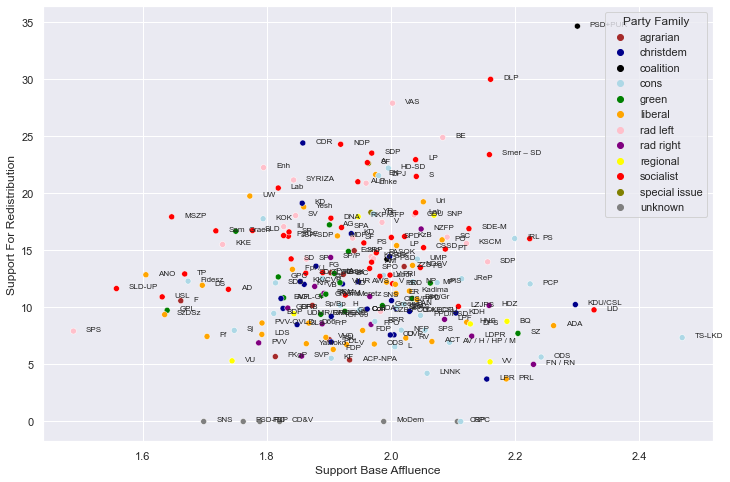

In [144]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df,x="Support Base Affluence",y="Support For Redistribution",
                hue="Party Family",palette=party_colour_dict);
# ,palette=party_colour_dict
# make size = percentage of the vote? "pervote"

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=8)

label_point(df["Support Base Affluence"],
            df["Support For Redistribution"],
            df["Abbreviation"], plt.gca())

# plt.xlabel("Support Base Affluence");
# plt.ylabel("Support For Redistribution");
# plt.gca().legend(title='Party Family');

In [145]:
# 405 different partyfacts_ids ... but 409 different rows

In [146]:
df.reset_index()["partyfacts_id"].value_counts()

# 1567: UK Conservatives
# 851: Italian Federation of the Greens
# 64: Lithuanian Social Democratic Party

1567    3
1022    1
2548    1
1231    1
685     1
       ..
308     1
1329    1
2255    1
301     1
1537    1
Name: partyfacts_id, Length: 204, dtype: int64

In [147]:
partyfacts_core_parties_newest.set_index("partyfacts_id").loc[64]

country                                                       LTU
technical                                                     NaN
name_short                                                   LSDP
name                             Lietuvos socialdemokratų partija
name_english                   Lithuanian Social Democratic Party
name_other                                                    NaN
year_first                                                   1896
year_last                                                     NaN
share                                                        20.6
share_year                                                   2004
new                                                           NaN
wikipedia       https://en.wikipedia.org/wiki/Social_Democrati...
description                                                   NaN
comment                                                       NaN
created                          2012-12-29 10:52:38.450000+00:00
modified  

In [148]:
manifesto_redist.dropna().reset_index()["partyfacts_id"].value_counts()

2702    4
1567    3
851     2
3955    2
64      2
       ..
2158    1
1260    1
1266    1
1271    1
2048    1
Name: partyfacts_id, Length: 1248, dtype: int64

In [149]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show,  output_notebook
from bokeh.layouts import column, row
from bokeh.embed import components
from bokeh.transform import factor_cmap
from bokeh.models import HoverTool
from bokeh.models import Span, Label
from bokeh.models import BoxAnnotation


output_notebook()

Loading BokehJS ...

In [150]:
# df["parfam"] = cmp_overlap_df["parfam"].cat.remove_unused_categories()
df["Party Family"].value_counts()

socialist        42
cons             34
liberal          32
christdem        23
rad left         19
green            16
rad right        14
agrarian          9
regional          7
unknown           6
special issue     2
coalition         2
Name: Party Family, dtype: int64

In [151]:
df["pervote_smaller"] = df_merged[search(df_merged,"\(manifesto\)pervote").index].loc[party_overlap]/2
df["rile"] = df_merged[search(df_merged,"\(manifesto\)rile").index].loc[party_overlap]
df["planeco"] = df_merged[search(df_merged,"\(manifesto\)planeco").index].loc[party_overlap]
df["markeco"] = df_merged[search(df_merged,"\(manifesto\)markeco").index].loc[party_overlap]
df["welfare"] = df_merged[search(df_merged,"\(manifesto\)welfare").index].loc[party_overlap]
df["intpeace"] = df_merged[search(df_merged,"\(manifesto\)intpeace").index].loc[party_overlap]

In [222]:
df["partyname"] = partyfacts_core_parties_newest.set_index("partyfacts_id")["name_english"].loc[party_overlap]
df["abbrev"] = partyfacts_core_parties_newest.set_index("partyfacts_id")["name_short"].loc[party_overlap]
df["country"] = partyfacts_core_parties_newest.set_index("partyfacts_id")["country"].loc[party_overlap]


In [224]:

# colours = mps["party"].replace(party_colour_dict).values
colors = factor_cmap('Party Family', palette=list(party_colour_dict.values()), factors=list(party_colour_dict.keys()))

hover = HoverTool(tooltips = [('name','@partyname'),
                              ('abbrev','@abbrev'),
                              ('party family','@{Party Family}'),
                              ('country','@country'),
#                               ('date','@date'),
                              ('right-left','@rile'),
                              ('planned economy','@planeco'),
                              ('market economy','@markeco'),
                              ('welfare','@welfare'),
                              ('intpeace','@intpeace')])

p1 = figure(plot_width=950, plot_height=400, title="Party Manifesto 'Redistributiveness' by Mean Electorate Income Decile",
            tools='box_select,pan,wheel_zoom,box_zoom,reset', active_drag="box_select",
            x_axis_label = "Support Base Affluence",y_axis_label="Support For Redistribution",)
for family in df["Party Family"].cat.categories:
    mask = df["Party Family"]==family
    source = ColumnDataSource(df[mask])
    p1.scatter('Support Base Affluence', 'Support For Redistribution',source=source,
               fill_color=party_colour_dict[family], line_color = party_colour_dict[family], alpha=0.7,
               legend_label=family,size='pervote_smaller')
    
#     p1.scatter('weighted_income_deciles', 'manifesto_redist', source=source, fill_color=colors, line_color = colors, alpha=0.7,
#               legend_group='parfam',size='pervote_smaller',)
p1.add_tools(hover)
p1.legend.location = "top_left"
p1.legend.click_policy="hide"
show(p1)

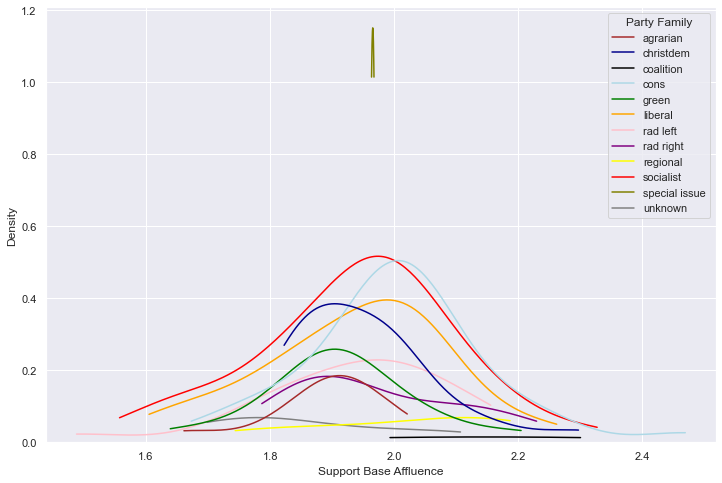

In [303]:
plt.figure(figsize=(12,8))
# df_merged["Party Family"] = party_family.fillna("unknown").astype('category')
sns.kdeplot( data = df,
             x = "Support Base Affluence",
             hue="Party Family",
             palette = party_colour_dict,
             cut=0);

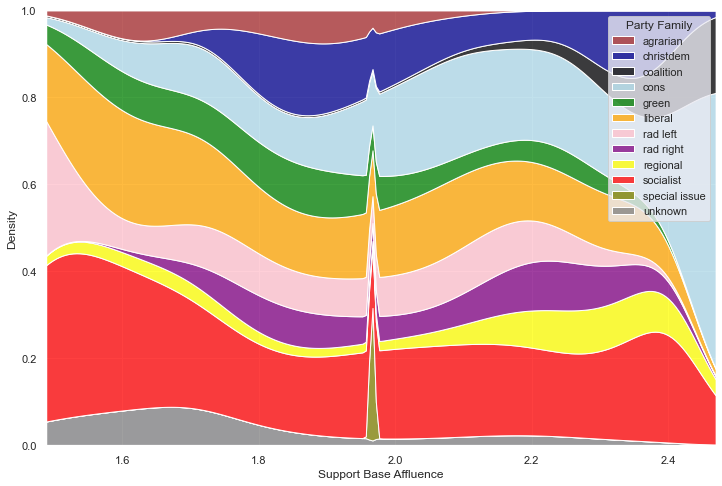

In [305]:
plt.figure(figsize=(12,8))
# df_merged["Party Family"] = party_family.fillna("unknown").astype('category')
sns.kdeplot( data = df,
             x = "Support Base Affluence",
             hue="Party Family",
             palette = party_colour_dict,
             cut=0,multiple='fill');


In [154]:
voter_level = output_df_mean.loc[party_overlap]
party_level = df_merged.loc[party_overlap]
pl = party_level.reset_index()
# pl[pl["partyfacts_id"]==1567]

party_level = pl.drop([19,20]).set_index("partyfacts_id")

In [155]:
party_level.shape,voter_level.shape

((204, 1187), (204, 103))

In [156]:
party_level.reset_index()["partyfacts_id"].value_counts()

1022    1
660     1
177     1
1231    1
685     1
       ..
821     1
308     1
1329    1
2255    1
1537    1
Name: partyfacts_id, Length: 204, dtype: int64

In [1588]:
# party_level.reset_index().drop_duplicates()

In [158]:
# n=208
# X[:n // 2].shape,X[n // 2:].shape

In [159]:
# X[0::2].shape,X[1::2].shape,

In [191]:
X.shape,Y.shape

((204, 1182), (204, 95))

204

Corr(X)
[[ 1.    0.27  0.31 ...  0.02 -0.01  0.01]
 [ 0.27  1.    0.64 ... -0.04 -0.01  0.1 ]
 [ 0.31  0.64  1.   ...  0.12  0.17  0.14]
 ...
 [ 0.02 -0.04  0.12 ...  1.    0.76  0.46]
 [-0.01 -0.01  0.17 ...  0.76  1.    0.46]
 [ 0.01  0.1   0.14 ...  0.46  0.46  1.  ]]
Corr(Y)
[[ 1.    0.03 -0.01 ...  0.1   0.01 -0.01]
 [ 0.03  1.    0.06 ... -0.26  0.   -0.01]
 [-0.01  0.06  1.   ...  0.03  0.07 -0.07]
 ...
 [ 0.1  -0.26  0.03 ...  1.    0.09 -0.09]
 [ 0.01  0.    0.07 ...  0.09  1.   -1.  ]
 [-0.01 -0.01 -0.07 ... -0.09 -1.    1.  ]]
True B (such that: Y = XB + Err)
Estimated B
[[ 0.   0.  -0.  ... -0.   0.  -0. ]
 [ 0.  -0.  -0.  ... -0.  -0.   0. ]
 [-0.  -0.   0.  ... -0.   0.  -0. ]
 ...
 [-0.  -0.   0.  ...  0.   0.  -0. ]
 [-0.  -0.  -0.  ...  0.   0.  -0. ]
 [-0.1 -0.   0.  ...  0.   0.  -0. ]]
Estimated betas
[[ 0.   0.  -0.  ... -0.   0.  -0. ]
 [ 0.  -0.  -0.  ... -0.  -0.   0. ]
 [-0.  -0.   0.  ... -0.   0.  -0. ]
 ...
 [-0.  -0.   0.  ...  0.   0.  -0. ]
 [-0.  -0.  -0

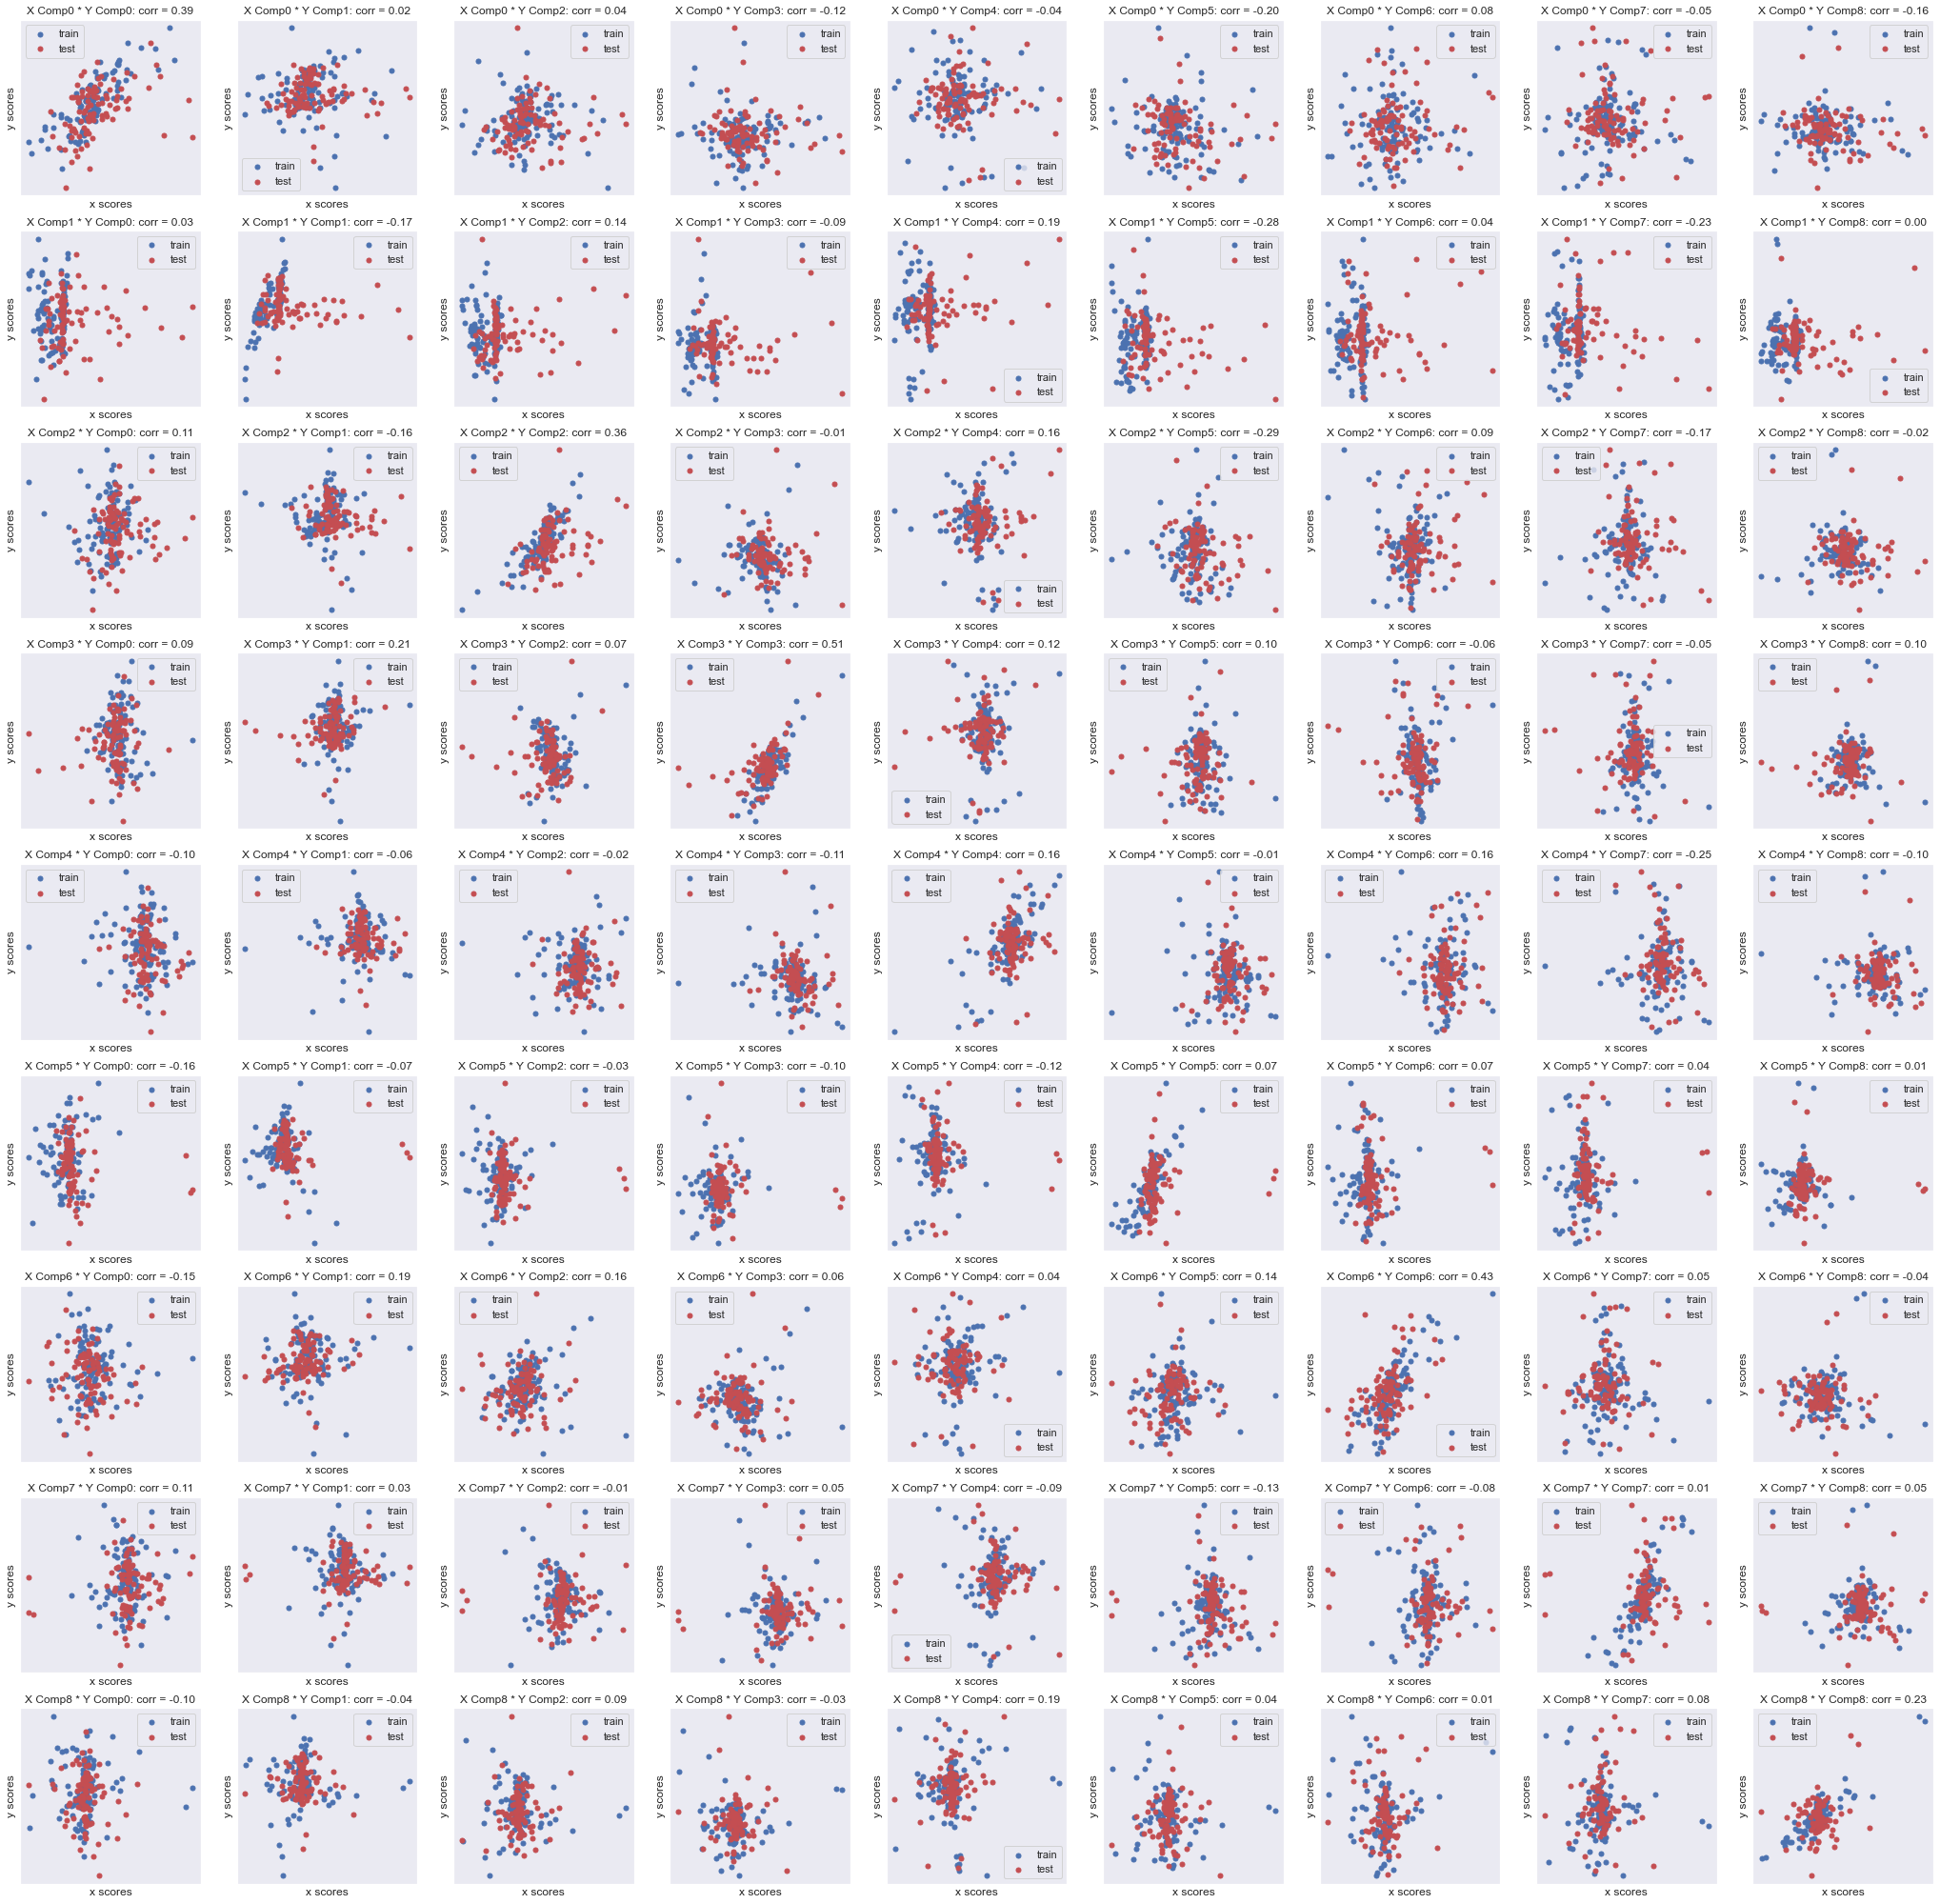

In [198]:
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Dataset based latent variables model

# n = 500
# # 2 latents vars:
# l1 = np.random.normal(size=n)
# l2 = np.random.normal(size=n)



# latents = np.array([l1, l1, l2, l2]).T
# X = latents + np.random.normal(size=4 * n).reshape((n, 4))
# Y = latents + np.random.normal(size=4 * n).reshape((n, 4))


n=party_level.shape[0]
X = party_level.fillna(party_level.mean()).dropna(axis=1)
Y = voter_level.fillna(voter_level.mean()).dropna(axis=1)

mask = np.random.rand(n,)>.5

X_train = X[mask]
Y_train = Y[mask]
X_test = X[~mask]
Y_test = Y[~mask]

print("Corr(X)")
print(np.round(np.corrcoef(X.T), 2))
print("Corr(Y)")
print(np.round(np.corrcoef(Y.T), 2))

# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
n_components = 9

plsca = PLSCanonical( n_components = n_components )
plsca.fit(X_train, Y_train)
X_train_r, Y_train_r = plsca.transform(X_train, Y_train)
X_test_r, Y_test_r = plsca.transform(X_test, Y_test)

# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(n_components*4, n_components*4))

pos=1
for comp1 in range(0,n_components):
    for comp2 in range(0,n_components):

        plt.subplot( n_components , n_components, pos )
        plt.scatter(X_train_r[:, comp1], Y_train_r[:, comp2], label="train",
                    marker="o", c="b", s=25)
        plt.scatter(X_test_r[:, comp1],  Y_test_r[:, comp2],  label="test",
                    marker="o", c="r", s=25)
        plt.xlabel("x scores")
        plt.ylabel("y scores")
        plt.title('X Comp%d * Y Comp%d: corr = %.2f' %
                  (comp1,comp2,np.corrcoef(X_test_r[:, comp1], Y_test_r[:, comp2])[0, 1]) )
        plt.xticks(())
        plt.yticks(())
        plt.legend(loc="best")
        
        pos=pos+1




# plt.subplot(221)
# plt.scatter(X_train_r[:, 0], Y_train_r[:, 0], label="train",
#             marker="o", c="b", s=25)
# plt.scatter(X_test_r[:, 0], Y_test_r[:, 0], label="test",
#             marker="o", c="r", s=25)
# plt.xlabel("x scores")
# plt.ylabel("y scores")
# plt.title('Comp. 1: X vs Y (test corr = %.2f)' %
#           np.corrcoef(X_test_r[:, 0], Y_test_r[:, 0])[0, 1])
# plt.xticks(())
# plt.yticks(())
# plt.legend(loc="best")

# plt.subplot(224)
# plt.scatter(X_train_r[:, 1], Y_train_r[:, 1], label="train",
#             marker="o", c="b", s=25)
# plt.scatter(X_test_r[:, 1], Y_test_r[:, 1], label="test",
#             marker="o", c="r", s=25)
# plt.xlabel("x scores")
# plt.ylabel("y scores")
# plt.title('Comp. 2: X vs Y (test corr = %.2f)' %
#           np.corrcoef(X_test_r[:, 1], Y_test_r[:, 1])[0, 1])
# plt.xticks(())
# plt.yticks(())
# plt.legend(loc="best")

# # 2) Off diagonal plot components 1 vs 2 for X and Y
# plt.subplot(222)
# plt.scatter(X_train_r[:, 0], X_train_r[:, 1], label="train",
#             marker="*", c="b", s=50)
# plt.scatter(X_test_r[:, 0], X_test_r[:, 1], label="test",
#             marker="*", c="r", s=50)
# plt.xlabel("X comp. 1")
# plt.ylabel("X comp. 2")
# plt.title('X comp. 1 vs X comp. 2 (test corr = %.2f)'
#           % np.corrcoef(X_test_r[:, 0], X_test_r[:, 1])[0, 1])
# plt.legend(loc="best")
# plt.xticks(())
# plt.yticks(())

# plt.subplot(223)
# plt.scatter(Y_train_r[:, 0], Y_train_r[:, 1], label="train",
#             marker="*", c="b", s=50)
# plt.scatter(Y_test_r[:, 0], Y_test_r[:, 1], label="test",
#             marker="*", c="r", s=50)
# plt.xlabel("Y comp. 1")
# plt.ylabel("Y comp. 2")
# plt.title('Y comp. 1 vs Y comp. 2 , (test corr = %.2f)'
#           % np.corrcoef(Y_test_r[:, 0], Y_test_r[:, 1])[0, 1])
# plt.legend(loc="best")
# plt.xticks(())
# plt.yticks(())
# plt.show()

# #############################################################################
# PLS regression, with multivariate response, a.k.a. PLS2

n = 1000
q = 3
p = 10
# X = np.random.normal(size=n * p).reshape((n, p))
# B = np.array([[1, 2] + [0] * (p - 2)] * q).T
# # each Yj = 1*X1 + 2*X2 + noize
# Y = np.dot(X, B) + np.random.normal(size=n * q).reshape((n, q)) + 5

pls2 = PLSRegression(n_components=3)
pls2.fit(X, Y)
print("True B (such that: Y = XB + Err)")
# print(B)
# compare pls2.coef_ with B
print("Estimated B")
print(np.round(pls2.coef_, 1))
pls2.predict(X)

# PLS regression, with univariate response, a.k.a. PLS1

n = 1000
p = 10
# X = np.random.normal(size=n * p).reshape((n, p))
# y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5




pls1 = PLSRegression(n_components=3)
pls1.fit(X, Y)
# note that the number of components exceeds 1 (the dimension of y)
print("Estimated betas")
print(np.round(pls1.coef_, 1))

# #############################################################################
# CCA (PLS mode B with symmetric deflation)

cca = CCA(n_components=2)
cca.fit(X_train, Y_train)
X_train_r, Y_train_r = cca.transform(X_train, Y_train)
X_test_r, Y_test_r = cca.transform(X_test, Y_test)

In [163]:
# %debug


In [200]:
# Y.isnull().sum()

In [201]:
plsca.x_weights_.shape,plsca.y_weights_.shape,

((1182, 9), (95, 9))

In [202]:
plsca.x_loadings_.shape,plsca.y_loadings_.shape,

((1182, 9), (95, 9))

In [203]:
pd.DataFrame(plsca.x_loadings_, columns = range(0,plsca.x_loadings_.shape[1]),index = X.columns)[0].abs().sort_values().tail(10)

(ees14)mfamily__green          0.092477
(parlgov)family__green         0.093513
(ches)mip_one__environment     0.094439
(ees14)per_v2_416a             0.094487
(ches)galtan                   0.095529
(ches)members_vs_leadership    0.097346
(ees14)per_v2_501a             0.098793
(ches)lifestyle                0.099036
(ches)enviro                   0.104975
(ches)enviro_salience          0.113295
Name: 0, dtype: float64

In [204]:
pd.DataFrame(plsca.y_loadings_, columns = range(0,plsca.y_loadings_.shape[1]),index = Y.columns)[0].abs().sort_values().tail(10)

IMD2001_2_01. YOUNGEST - 24 YEARS                 0.172343
IMD1016_1_2. TELEPHONE                            0.175198
IMD3001_ORD                                       0.191351
IMD2001_2_02. 25-34 YEARS                         0.215424
IMD2001_2_03. 35-44 YEARS                         0.230302
IMD2001_2_05. 55-64 YEARS                         0.230906
IMD2001_2_06. 65 - OLDEST                         0.234222
IMD1016_2_3. MAIL OR SELF-COMPLETED SUPPLEMENT    0.244820
IMD2004_2. WIDOWED                                0.305631
IMD2004_4. SINGLE, NEVER MARRIED                  0.318578
Name: 0, dtype: float64

In [205]:
pd.DataFrame(plsca.x_loadings_, columns = range(0,plsca.x_loadings_.shape[1]),index = X.columns)[1].abs().sort_values().tail(10)

(ees14)per_v1_60112a    0.134156
(ees14)per_v3_304b      0.135317
(ees14)per_v3_7052b     0.135317
(ees14)per_v1_6051b     0.135317
(ees14)per_v1_405b      0.135317
(ees14)per_v3_3141a     0.135317
(ees14)per_v3_308b      0.135317
(ees14)per_v1_416b      0.135317
(ees14)per_v1_3162b     0.135317
(ees14)per_v3_409b      0.135317
Name: 1, dtype: float64

In [206]:
pd.DataFrame(plsca.y_loadings_, columns = range(0,plsca.y_loadings_.shape[1]),index = Y.columns)[1].abs().sort_values().tail(10)

IMD2003_1. PRIMARY EDUCATION/LOWER SECONDARY EDUCATION                                                                   0.194859
IMD2003_4. UNIVERSITY EDUCATION                                                                                          0.194903
IMD3008_H_ORD                                                                                                            0.195194
IMD3001_UH_ORD                                                                                                           0.197890
IMD3005_1_ORD                                                                                                            0.199963
IMD3015_2_ORD                                                                                                            0.213890
IMD2005_4. OTHER CHRISTIAN (NO DENOMINATION GIVEN; INDEPENDENT; NON-AFFILIATED; NON-TRADITIONAL PROTESTANTS; MORMONS)    0.221516
IMD3013_3_ORD                                                                             

In [171]:
pd.DataFrame(plsca.x_loadings_, columns = range(0,plsca.x_loadings_.shape[1]),index = X.columns)[3].abs().sort_values().tail(10)

(ees14)per_v2_3191b            0.082285
(ees14)per_v2_107a             0.082323
(ches)enviro_salience          0.083312
(ees14)per_v2_202a             0.085318
(ees14)per_v2_403a             0.085931
(ees14)per_v3_501a             0.086449
(ees14)rile_mrg                0.087170
(ees14)per_v2_501a             0.088202
(ches)members_vs_leadership    0.088289
(ees14)per_v1_305a             0.092119
Name: 3, dtype: float64

In [172]:
pd.DataFrame(plsca.y_loadings_, columns = range(0,plsca.y_loadings_.shape[1]),index = Y.columns)[3].abs().sort_values().tail(10)

IMD2005_3. ORTHODOX/EASTERN CATHOLIC CHURCHES       0.175205
IMD2001_2_06. 65 - OLDEST                           0.176656
IMD1016_2_2. TELEPHONE                              0.181596
IMD2001_2_01. YOUNGEST - 24 YEARS                   0.190761
IMD2004_4. SINGLE, NEVER MARRIED                    0.192159
IMD2004_1. MARRIED OR LIVING TOGETHER AS MARRIED    0.197011
IMD3009_G_ORD                                       0.209957
IMD2005_12. NON-BELIEVERS                           0.227364
IMD3007_F_ORD                                       0.231180
IMD3005_4_ORD                                       0.238679
Name: 3, dtype: float64

In [220]:
process_variable_manifest = pd.read_csv(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"process_variable_manifest.csv")

In [207]:
Treatment = "CSES Respondent Decomposition"
output_subfolder = output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [ ]:
# variable_labels = pd.read_pickle(dataset_folder+Manifesto_Project_Dataset_version_2019b.replace(".dta","_variable_labels.zip"),compression='zip')
# fn = dataset_folder+Manifesto_Project_Dataset_version_2019b.replace(".dta","_value_labels.pkl")
# with open(fn, "rb") as f: value_labels = pickle.load(f) 

In [221]:
# output_df_mean.dropna(how='all',axis=1)

In [215]:
# value_vars = [x for x in manifesto_project.columns if re.match("per(\d+|uncod)|rile|planeco|markeco|welfare|intpeace",x)]
# # rile, planeco, markeco, welfare, intpeace
# MCP_vals = manifesto_project[value_vars]
# MCP_vals = MCP_vals.fillna(MCP_vals.mean())
# # df["peruncod"]
# # percentage uncoded
# MCP_vals.columns = [variable_labels.loc[x]+"("+x.replace("per","")+")" for x in MCP_vals.columns]
# # MCP_vals.columns
# MCP_vals = MCP_vals.drop_duplicates()

MCP_vals = output_df_mean.dropna(how='all',axis=1)
MCP_vals = MCP_vals.fillna(output_df_mean.mean())

In [216]:
decomp_index = MCP_vals.index
decomp_columns = MCP_vals.columns
clean_feature_set_std = StandardScaler().fit_transform(MCP_vals.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = MCP_vals.columns,
                             index   = MCP_vals.index      )

In [217]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = decomp_std.shape[1]
n_components = 3
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)


Wall time: 1.63 s


In [218]:
import pickle
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    decomp_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    decomp_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

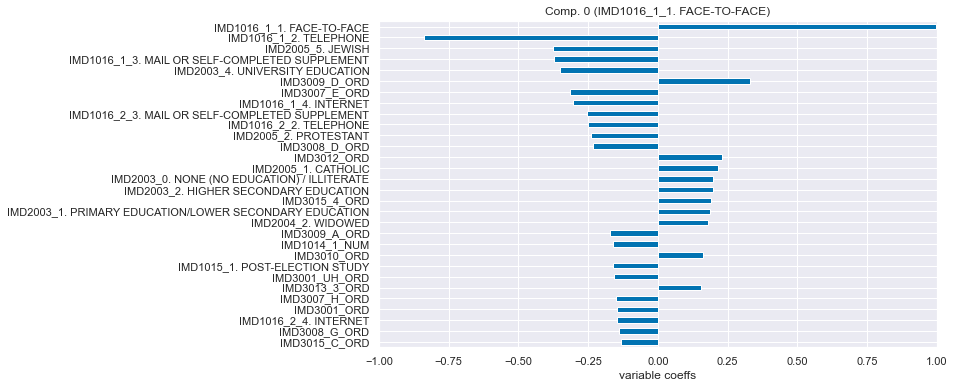

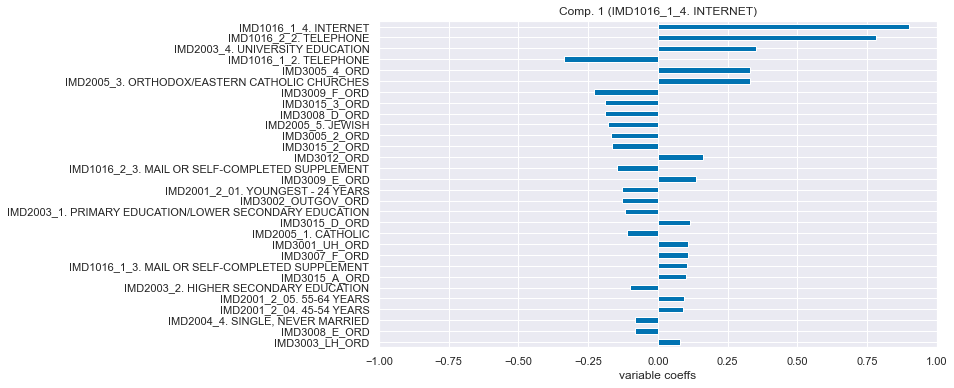

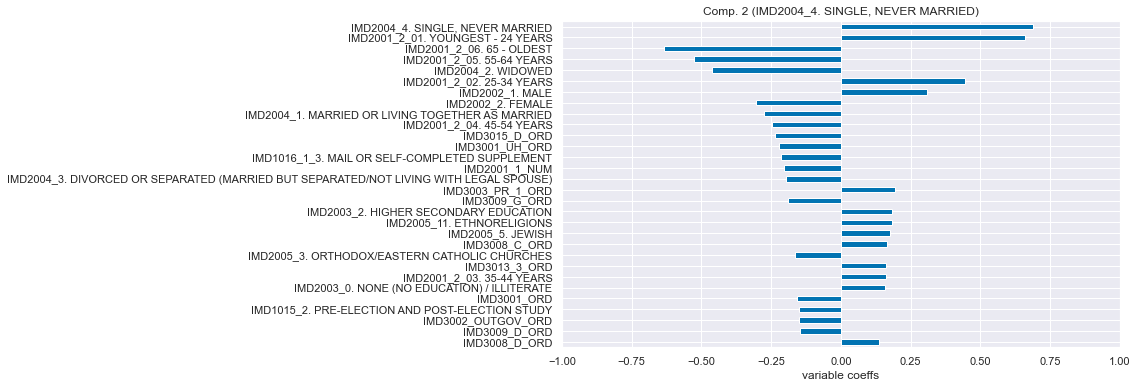

In [219]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

Index(['(manifesto)rile'], dtype='object')

In [1587]:
# df_merged

In [177]:
green_parties = party_family[(party_family=="green")].index

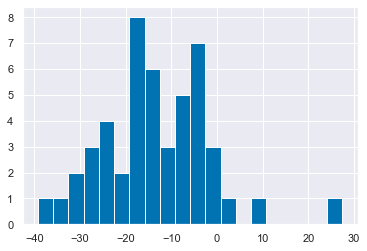

In [178]:
df_merged.loc[green_parties,"(manifesto)rile"].hist(bins=20)

In [179]:
# df_merged["Party Family"].value_counts(dropna=False)

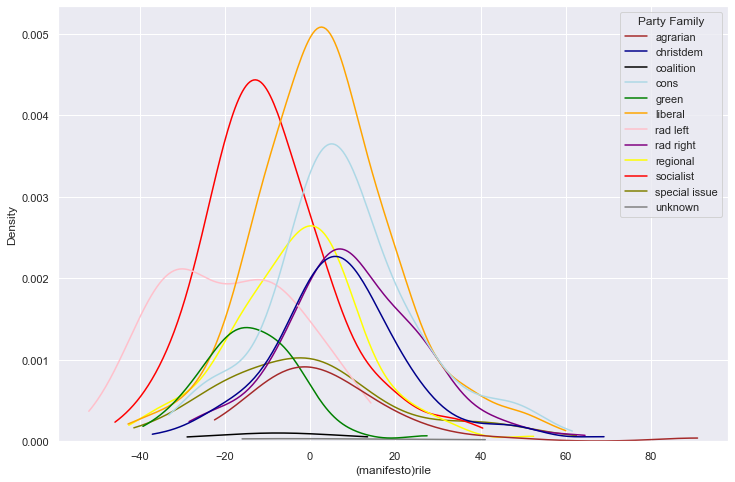

In [180]:
plt.figure(figsize=(12,8))
df_merged["Party Family"] = party_family.fillna("unknown").astype('category')
sns.kdeplot( data = df_merged[["(manifesto)rile","Party Family"]],
             x = "(manifesto)rile",
             hue="Party Family",
             palette = party_colour_dict,
             cut=0);

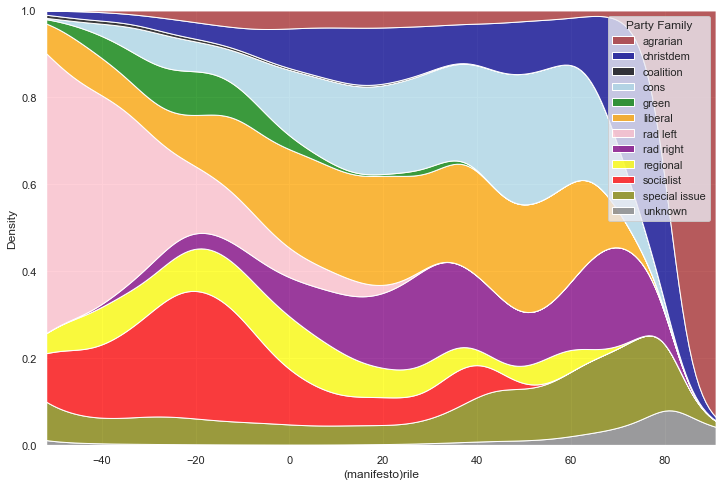

In [181]:
plt.figure(figsize=(12,8))
df_merged["Party Family"] = party_family.fillna("unknown").astype('category')
sns.kdeplot( data = df_merged[["(manifesto)rile","Party Family"]],
             x = "(manifesto)rile",
             hue="Party Family",
             palette = party_colour_dict,
             cut=0,multiple='fill');

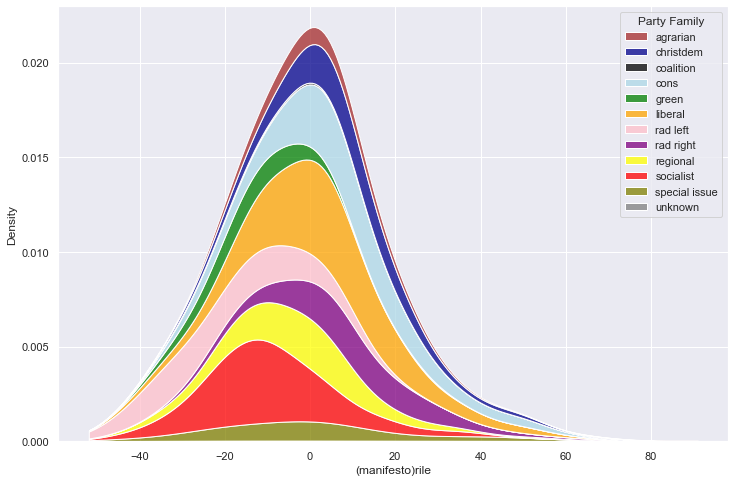

In [182]:
plt.figure(figsize=(12,8))
df_merged["Party Family"] = party_family.fillna("unknown").astype('category')
sns.kdeplot( data = df_merged[["(manifesto)rile","Party Family"]],
             x = "(manifesto)rile",
             hue="Party Family",
             palette = party_colour_dict,
             cut=0,multiple='stack');

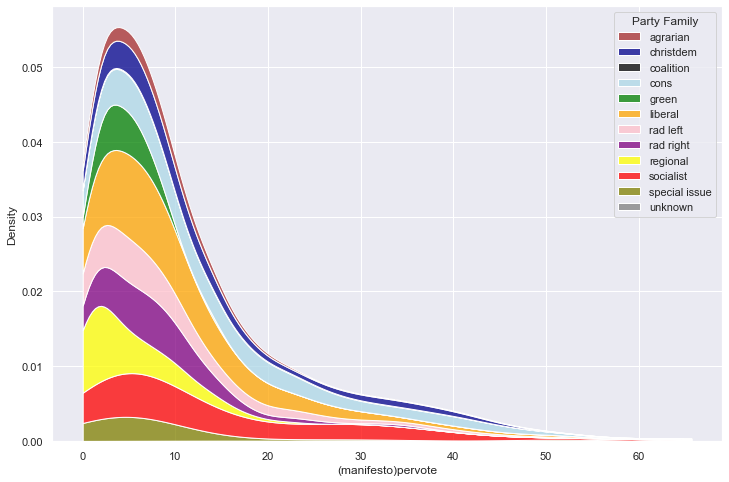

In [183]:
plt.figure(figsize=(12,8))
# df_merged["Party Family"] = party_family.fillna("unknown").astype('category')
sns.kdeplot( data = df_merged[["(manifesto)pervote","Party Family"]],
             x = "(manifesto)pervote",
             hue="Party Family",
             palette = party_colour_dict,
             cut=0,multiple='stack');

In [184]:
df_merged["(manifesto)rile"].describe()

count    1075.000000
mean       -0.880345
std        19.234776
min       -51.905000
25%       -13.168095
50%        -0.927500
75%         9.286062
max        90.909000
Name: (manifesto)rile, dtype: float64

In [185]:
df_merged.loc[green_parties,"(manifesto)rile"][df_merged.loc[green_parties,"(manifesto)rile"]>0].index

Int64Index([820, 886, 2157], dtype='int64', name='partyfacts_id')

In [186]:
partyfacts_core_parties_newest.set_index("partyfacts_id").loc[df_merged.loc[green_parties,"(manifesto)rile"][df_merged.loc[green_parties,"(manifesto)rile"]>-10].index].drop_duplicates()

,country,technical,name_short,name,name_english,name_other,year_first,year_last,share,share_year,new,wikipedia,description,comment,created,modified
partyfacts_id,,,,,,,,,,,,,,,,
446,MEX,NaN,PVEM,Partido Verde Ecologista de México,Ecologist Green Party of Mexico,NaN,1993,NaN,7.7,2003.0,NaN,https://en.wikipedia.org/wiki/Ecologist_Green_...,NaN,NaN,2012-12-29 10:53:48.938000+00:00,2018-07-07 20:07:06.274151+00:00
528,BEL,NaN,AGL-Gr,Agalev – Groen,Agalev -- Green,NaN,1979,NaN,7.0,1999.0,NaN,https://en.wikipedia.org/wiki/Anders_Gaan_Leven,NaN,NaN,2012-12-29 10:54:04.806000+00:00,2018-07-07 19:50:35.203945+00:00
820,BGR,NaN,PKE,"Politicheski klub ""Ekoglasnost""","Political Club ""Ecoglasnost""",NaN,1990,1997.0,22.7,1997.0,NaN,http://bg.wikipedia.org/wiki/%D0%9F%D0%BE%D0%B...,NaN,NaN,2012-12-29 10:55:02.011000+00:00,2018-11-18 17:58:16.092234+00:00
851,ITA,NaN,FdV,Federazione dei Verdi,Federation of the Greens,NaN,1987,NaN,2.8,1992.0,NaN,https://en.wikipedia.org/wiki/Federation_of_th...,NaN,NaN,2012-12-29 10:55:08.273000+00:00,2018-10-07 18:31:32.227885+00:00
858,CYP,NaN,KOP,Kinima Oikologoi Perivallontistoi,Ecological and Environmental Movement,NaN,1996,NaN,2.2,2011.0,NaN,https://en.wikipedia.org/wiki/Ecological_and_E...,NaN,NaN,2012-12-29 10:55:09.649000+00:00,2018-07-07 20:02:41.986092+00:00
886,PRT,NaN,PEV,Partido Ecologista – Os Verdes,Ecology Party -- Greens,NaN,1982,NaN,1.2,2002.0,NaN,https://en.wikipedia.org/wiki/Ecologist_Party_...,NaN,NaN,2012-12-29 10:55:15.073000+00:00,2018-07-07 20:08:28.345673+00:00
1099,NZL,NaN,Greens,Green Party,Green Party,NaN,1990,NaN,11.1,2011.0,NaN,https://en.wikipedia.org/wiki/Green_Party_of_A...,NaN,NaN,2012-12-29 10:55:58.891000+00:00,2018-07-07 20:07:42.281164+00:00
1273,FRA,NaN,GE,Generation écologie,Ecology Generation,NaN,1994,1997.0,2.7,1997.0,NaN,https://en.wikipedia.org/wiki/Ecology_Generation,NaN,NaN,2012-12-29 10:56:34.425000+00:00,2018-07-07 20:03:45.211632+00:00
1373,ROU,NaN,PER,Partidul Ecologist Român,Romanian Ecologist Party,NaN,1990,NaN,1.7,1990.0,NaN,https://en.wikipedia.org/wiki/Ecologist_Party_...,NaN,NaN,2012-12-29 10:56:54.562000+00:00,2019-05-11 00:26:19.346441+00:00


In [454]:
## checking some irregularities in the unmerged party level dataset
raw_party_level = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "df.zip",compression='zip')

# could we have an issue due to partyfacts_id updates differing between CSES and the initial party-level data run?

In [710]:
technical_pf_ids = partyfacts_core_parties_newest[ partyfacts_core_parties_newest["technical"].notnull() ]["partyfacts_id"].values
original_raw_party_level = raw_party_level.copy()
raw_party_level = raw_party_level.drop( raw_party_level[raw_party_level["partyfacts_id"].apply(lambda x: x in technical_pf_ids)].index )

# temp[:,:,"pimpo"]

# aha - this is one of the "technical" partyfacts references - Spanish 1% party 
# would be nice to find a way to include these SOME DAY
# but for now, we should flush them out

In [1012]:
# raw_party_level[raw_party_level["partyfacts_id"]==2538.0]

In [ ]:
## WORRY: the suggestion of the same partyid coming up in *different* countries
## could be legit, but merits checking

# unique_countries_per_partyfacts_id = raw_party_level.groupby( "partyfacts_id" )["country"].unique()
# unique_countries_per_partyfacts_id.apply(lambda x: len(x)).sort_values()

## Nope - never happened, don't worry, partfacts_id link at most to one country

In [ ]:
## WORRY: datasets with multiple entries in the same year
# As far as I know, should only be the case for the dataset that reports every quarter

In [317]:
search(raw_party_level,"dataset")
# raw_party_level

dataset                      11819
dataset_index                11819
(manifesto)datasetorigin      4582
(manifesto)datasetversion     4582
dtype: int64

In [711]:
manifesto_project = pd.read_pickle(dataset_folder+"CMP"+os.sep+ "manifesto_project_linked.zip",compression='zip')

CHES_comb = pd.read_pickle(dataset_folder+"CHES"+os.sep+"CHES_comb_linked.zip",compression='zip')
usefol_cols = ['country', 'party_id', 'year', 'party', 'vote', 'family', 'source', 'govt', 'partyname1', 'partyname2', 'vote1', 'intgroup', 'epgroup', 'govt1', 'govt2', 'govt3','seat', 'electionyear','cmp_id', 'epvote',]

pip_ideol = pd.read_pickle( dataset_folder+"PIP"+os.sep+"ideological_indices_linked.zip" , compression = 'zip' )
pip_uid_string_to_quarter = pip_ideol.set_index("Unique ID for each observation (ISO.Quarter.Party)")["Quarter"]
raw_party_level["(pip)Quarter"] = raw_party_level["(pip)Unique ID for each observation (ISO.Quarter.Party)"].apply(lambda x: pip_uid_string_to_quarter.loc[x] if x in pip_uid_string_to_quarter.index else np.nan)
raw_party_level["(pip)party_id"] = raw_party_level["(pip)Unique ID for each observation (ISO.Quarter.Party)"].apply(lambda x: x.split(".")[2] if pd.notnull(x) else np.nan).astype(float)
pip_ideol["pip_party_id"] = pip_ideol["Unique ID for each observation (ISO.Quarter.Party)"].apply(lambda x: x.split(".")[2]).astype(int)
## list for 

raw_party_level["uid"] = raw_party_level.reset_index().index

raw_party_level.loc[ (raw_party_level["partyfacts_id"]==48)\
                    & (raw_party_level["year"]==1989)\
                    & (raw_party_level["(ees14)ees_id"].notnull()), "edate" ] = pd.to_datetime("1989-06-18")

In [852]:
unique_datasets_per_partyfacts_year_id = raw_party_level.groupby( ["partyfacts_id","year"] )["dataset"].value_counts()

In [692]:
# unique_datasets_per_partyfacts_year_id.apply(lambda x: len(x)).sort_values()
# interesting dataset overlap goes from 1-5 (4 cases in 1999)
# FPO,SPO,OVP,Austrian Greens

In [735]:
temp = unique_datasets_per_partyfacts_year_id[unique_datasets_per_partyfacts_year_id>1].sort_values()
temp.name = 'count'
temp.reset_index()["dataset"].value_counts()

manifesto    39
pip          28
Name: dataset, dtype: int64

In [861]:
temp = unique_datasets_per_partyfacts_year_id[unique_datasets_per_partyfacts_year_id>1].sort_values()
temp.name = 'count'
temp.reset_index()["dataset"].value_counts()

manifesto    38
pip          28
Name: dataset, dtype: int64

In [862]:
multiple_EE_same_year = temp.sort_index(level='year').reset_index()
multiple_EE_same_year

,partyfacts_id,year,dataset,count
0,277.0,1953,manifesto,2
1,277.0,1953,pip,2
2,379.0,1953,manifesto,2
3,379.0,1953,pip,2
4,536.0,1953,manifesto,2
...,...,...,...,...
61,1660.0,2015,manifesto,2
62,1660.0,2015,pip,2
63,3118.0,2015,manifesto,2
64,3118.0,2015,pip,2


In [854]:
raw_party_level = raw_party_level[raw_party_level["partyfacts_id"].notnull()]

In [ ]:
### we need to create a UID for ELECTORAL EVENTS ... "year" will not do because of years with multiple elections

In [829]:
## we can use multiple_EE_same_year to find specific rows with multi-election years
# -> should be country x 


# use these columns to detect *which is which*
# raw_party_level["(pip)Quarter"].dropna()

In [955]:
# multiple_EE_same_year

In [1001]:
mult_elections_country_year_indices = raw_party_level.set_index(["partyfacts_id","year"]).loc[multiple_EE_same_year.set_index(["partyfacts_id","year"]).index].reset_index()[["partyfacts_id","year","country"]].sort_values(by=['country','year'])[["country","year"]].drop_duplicates().set_index(["country","year"]).index

#.set_index(["year","country"]).index

## (North) Macedonia???

multiple_election_date_dict = {
    ("dnk",1953):[pd.to_datetime("1953-04-21"),pd.to_datetime("1953-09-22")],
    ("gbr",1974):[pd.to_datetime("1974-02-28"),pd.to_datetime("1974-10-10")],
    ("grc",1989):[pd.to_datetime("1989-06-18"),pd.to_datetime("1989-11-05")],
    ("grc",2012):[pd.to_datetime("2012-05-06"),pd.to_datetime("2012-06-17")],
    ("grc",2015):[pd.to_datetime("2015-01-25"),pd.to_datetime("2015-09-20")],
    ("irl",1982):[pd.to_datetime("1982-02-18"),pd.to_datetime("1982-11-24")],
    ("isl",1959):[pd.to_datetime("1959-06-28"),pd.to_datetime("1959-10-25")],
    ("tur",2015):[pd.to_datetime("2015-06-07"),pd.to_datetime("2015-11-01")],
}

mult_elections_in_one_year_df = raw_party_level.set_index(["country","year"]).loc[mult_elections_country_year_indices]["edate"].drop_duplicates().reset_index().sort_values(by=["country","year","edate"]).set_index(["country","year"])

def get_closest_date(first_date,second_date,focal_date):
    # equal distance -> matches to second date
    if abs(focal_date-first_date) <abs(focal_date-second_date):
        return (first_date,1)
    else:
        return (second_date,2)

mult_elections_in_one_year_df["Electoral Event No"] = [get_closest_date(multiple_election_date_dict[x][0],multiple_election_date_dict[x][1],e)[1] for x,e in zip(mult_elections_in_one_year_df["edate"].index,mult_elections_in_one_year_df["edate"])]
mult_elections_in_one_year_df["Electoral Event Date"] = [get_closest_date(multiple_election_date_dict[x][0],multiple_election_date_dict[x][1],e)[0] for x,e in zip(mult_elections_in_one_year_df["edate"].index,mult_elections_in_one_year_df["edate"])]


    
mult_elections_in_one_year_df.loc[mult_elections_in_one_year_df["edate"]=="1953-07-01","Electoral Event No"] = 2
mult_elections_in_one_year_df.loc[mult_elections_in_one_year_df["edate"]=="1953-07-01","Electoral Event Date"] = pd.to_datetime("1953-09-22")
mult_elections_in_one_year_df["edate"] = mult_elections_in_one_year_df["edate"].apply(lambda x: pd.to_datetime(x))
mult_elections_in_one_year_df = mult_elections_in_one_year_df.reset_index().set_index(["country","year","edate"])
mult_elections_in_one_year_df
# .fillna(pd.to_datetime("1989-06-18"))

## how do we decide how to split events? nearest neighbour?
# nearly works perfectly
# - but only after implementing I realise I really don't want to be left with one dataset with two dates assigned
# to the same electoral event -
# so I guess I hardcode Denmark 1953 to peg the "1953-07-01" sample as associated with the second election



# # dnk
# GE1: 21 April 1953: 1953-04-21
# GE2: 22 Sept  1953: 1953-09-22
# # gbr
# GE1: 28 February 1974: 1974-02-28
# GE2: 10 October 1974: 1974-10-10
# # grc
# GE1: 18 June 1989:1989-06-18
# GE2: 5 November 1989:1989-11-05
# GE1: 6 May 2012:2012-05-06
# GE2: 17 June 2012:2012-06-17
# GE1: 25 January 2015:2015-01-25
# GE2: 20 September 2015:2015-09-20
# irl
# GE1: 18 February 1982:1982-02-18
# GE2: 24 November 1982:1982-11-24
# isl
# GE1: 28 June 1959:1959-06-28
# GE2: 25 and 26 October 1959:1959-10-25
# tur
# GE1: 7 June 2015:2015-06-07
# GE2: 1 November 2015:2015-11-01



Electoral Event No Electoral Event Date
country year edate                                              
dnk     1953 1953-04-01                   1           1953-04-21
             1953-04-21                   1           1953-04-21
             1953-07-01                   2           1953-09-22
             1953-09-22                   2           1953-09-22
gbr     1974 1974-01-01                   1           1974-02-28
             1974-02-28                   1           1974-02-28
             1974-10-01                   2           1974-10-10
             1974-10-10                   2           1974-10-10
grc     1989 1989-04-01                   1           1989-06-18
             1989-06-18                   1           1989-06-18
             1989-10-01                   2           1989-11-05
             1989-11-05                   2           1989-11-05
        2012 2012-04-01                   1           2012-05-06
             2012-05-06                   1           2012-05-06
             2012-06-17                   2           2012-06-17
        2015 2015-01-01                   1           2015-01-25
             2015-01-25                   1           2015-01-25
             2015-07-01                   2           2015-09-20
             2015-09-20                   2           2015-09-20
irl     1982 1982-01-01                   1           1982-02-18
             1982-02-18                   1           1982-02-18
             1982-10-01                   2           1982-11-24
             1982-11-24                   2           1982-11-24
isl     1959 1959-04-01                   1           1959-06-28
             1959-06-28                   1           1959-06-28
             1959-10-01                   2           1959-10-25
             1959-10-25                   2           1959-10-25
tur     2015 2015-06-07                   1           2015-06-07
             2015-11-01                   2           2015-11-01

In [1013]:
# ('dnk', 1953, '1953-04-01') in mult_elections_in_one_year_df.index

In [1007]:
# raw_party_level["edate"].str

In [1008]:
raw_party_level["ELECTORAL EVENT"] = raw_party_level.apply(lambda x: str(x["year"]) +"-"+str(mult_elections_in_one_year_df.loc[(x["country"],x["year"],x["edate"]),"Electoral Event No"]) if (x["country"],x["year"],x["edate"]) in mult_elections_in_one_year_df.index else str(x["year"]),axis=1 )

# str(x["year"])

In [1011]:
# raw_party_level["ELECTORAL EVENT"].value_counts().tail(50)

In [886]:
mult_elections_party_year_indices = multiple_EE_same_year[["partyfacts_id","year"]].drop_duplicates().set_index(["partyfacts_id","year"]).index

In [921]:
temp2 = raw_party_level.set_index(["partyfacts_id","year"]).loc[mult_elections_party_year_indices]
# list(temp2[temp2["edate"].isnull()].dropna(axis=1).columns)
#.dropna(how='all',axis=1).isnull().sum().sort_values().head(50)

# temp2[""]
temp2[temp2["edate"].isnull()].dropna(axis=1)[['country', 'dataset', 'dataset_index',  '(ees14)partyname', '(ees14)initials', '(ees14)EPseats',
       '(ees14)country_year', 
       '(ees14)eep',
       '(ees14)partyinfo', '(ees14)pfamily', '(ees14)mfamily',
       '(ees14)ofamily', '(ees14)EPvote','(ees14)EPseats', '(ees14)EPseatsum', '(ees14)group',
       '(ees14)manif', '(ees14)NATvote', '(ees14)NATseats',  ]]
temp2.reset_index()

party_year_uids = temp2["uid"].values
### gotcha - last national election is:
# https://en.wikipedia.org/wiki/1985_Greek_legislative_election

# ergo, it's the *first* Greek general election
# I mean, of course it is - same date as the european election ... and this is a european election dataset
# Still ... had(~) to check

In [954]:
raw_party_level.loc[ (raw_party_level["partyfacts_id"]==48)\
                    & (raw_party_level["year"]==1989)\
                    & (raw_party_level["(ees14)ees_id"].notnull()), "edate" ] = pd.to_datetime("1989-06-18")

In [943]:
raw_party_level.set_index(["partyfacts_id","year"]).loc[mult_elections_party_year_indices][raw_party_level.set_index(["partyfacts_id","year"]).loc[mult_elections_party_year_indices]["edate"].isnull()]["uid"]

partyfacts_id  year
48.0           1989    10538
Name: uid, dtype: int64

In [926]:
 raw_party_level.set_index("uid").loc[ set(country_year_uids) - set(party_year_uids) ].dropna(how='all',axis=1)

,country,year,partyfacts_id,dataset,dataset_index,(manifesto)countryname,(manifesto)oecdmember,(manifesto)eumember,edate,(manifesto)date,...,(pip)Index Budge et al.: RILE,(pip)Index Budge et al.: Planned Economy,(pip)Index Budge et al.: Market Economy,(pip)Index Budge et al.: Welfare,(pip)Index Budge et al.: International Peace,"(pip)Ad hoc-Index: Pro/Anti EU (Warntjen, Hix, Crombez 2008)",(pip)Ad hoc-Index: GG light (Knill),(pip)partyfacts_id_cmp,(pip)party_id,(pip)Quarter
uid,,,,,,,,,,,,,,,,,,,,,
3747,grc,2012,965.0,manifesto,PCICJI,Greece,oecd member,eu member,2012-05-06,201205.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
7309,dnk,1953,932.0,pip,36103,NaN,NaN,NaN,1953-07-01,NaN,...,41.667,0.000,12.500,0.000,8.333,0.000,0.000,932.0,13421.0,1953-07-01
8045,grc,2012,965.0,pip,64541,NaN,NaN,NaN,2012-04-01,NaN,...,7.020,2.028,5.772,13.261,1.560,-0.312,4.212,965.0,34710.0,2012-04-01
8050,grc,2015,1160.0,pip,64718,NaN,NaN,NaN,2015-01-01,NaN,...,-6.709,2.532,10.316,8.861,1.519,2.405,5.759,1160.0,34213.0,2015-01-01
3766,grc,2015,1160.0,manifesto,9OX5NJ,Greece,oecd member,eu member,2015-09-20,201509.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3767,grc,2015,4512.0,manifesto,K5PI3E,Greece,oecd member,eu member,2015-09-20,201509.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2326,dnk,1953,932.0,manifesto,5C6NXA,Denmark,no oecd member,no eu membership,1953-09-22,195309.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3770,grc,2015,2510.0,manifesto,HWS7UF,Greece,oecd member,eu member,2015-09-20,201509.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8061,grc,2015,2510.0,pip,64757,NaN,NaN,NaN,2015-07-01,NaN,...,-1.393,2.454,10.942,8.820,6.300,2.917,1.923,2510.0,34410.0,2015-07-01


In [892]:
 temp2.reset_index()["partyfacts_id"].value_counts() - raw_party_level.set_index(["country","year"]).loc[mult_elections_country_year_indices]["partyfacts_id"].value_counts()

# country_year - party_year
# 1160.0    2.0

932.0     NaN
965.0     NaN
2510.0    NaN
4512.0    NaN

48.0      0.0
208.0     0.0
277.0     0.0
301.0     0.0
306.0     0.0
363.0     0.0
379.0     0.0
516.0     0.0
536.0     0.0
540.0     0.0
562.0     0.0
794.0     0.0
932.0     NaN
964.0     0.0
965.0     NaN
1055.0    0.0
1060.0    0.0
1134.0    0.0
1160.0   -2.0
1204.0    0.0
1249.0    0.0
1288.0    0.0
1325.0    0.0
1468.0    0.0
1507.0    0.0
1516.0    0.0
1567.0    0.0
1610.0    0.0
1651.0    0.0
1660.0    0.0
2510.0    NaN
3118.0    0.0
4512.0    NaN
6042.0    0.0
Name: partyfacts_id, dtype: float64

In [897]:
raw_party_level.loc[raw_party_level["partyfacts_id"]==1160,:][search(raw_party_level,"(manifesto)").index].dropna(how='all',axis=1)

,(manifesto)countryname,(manifesto)oecdmember,(manifesto)eumember,(manifesto)date,(manifesto)party,(manifesto)partyname,(manifesto)partyabbrev,(manifesto)family,(manifesto)coderid,(manifesto)manual,...,(manifesto)family__christdem,(manifesto)family__coalition,(manifesto)family__cons,(manifesto)family__green,(manifesto)family__liberal,(manifesto)family__rad left,(manifesto)family__rad right,(manifesto)family__regional,(manifesto)family__socialist,(manifesto)family__special issue
1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TTFP37,Greece,oecd member,eu member,201205.0,34213.0,Democratic Left,DIMAR,rad left,317,version 5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1C2OZH,Greece,oecd member,eu member,201206.0,34213.0,Democratic Left,DIMAR,rad left,317,version 5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9OX5NJ,Greece,oecd member,eu member,201509.0,34213.0,Democratic Left,DIMAR,rad left,not applicable,not applicable,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
64531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [789]:
raw_party_level[raw_party_level["edate"].isnull()].notnull().sum().head(50)

# look into getting more consistent edate numbers!

(ches)eumember               2030
country                      2921
(ches)expert                 1105
(ches)party_id               2030
year                         2921
(ches)party                  1470
(ches)vote                   1578
(ches)family                 1161
(ches)eu_position            1933
(ches)future                  141
(ches)eu_ep                   976
(ches)eu_fiscal               141
(ches)eu_employ               307
(ches)eu_cohesion            1214
(ches)eu_environ              310
(ches)eu_asylum               677
(ches)eu_foreign             1221
(ches)lrgen                  1905
(ches)lrecon                 1494
(ches)galtan                 1493
(ches)source                 2030
(ches)govt                   1066
(ches)partyname1              395
(ches)partyname2              395
(ches)vote1                   353
(ches)eu_intmark             1085
(ches)eu_agri                 170
(ches)enlargw                  98
(ches)enlarge                  72
(ches)eu_ep_di

In [724]:

#.reset_index()["year"].value_counts().sort_index()
# pip_repeats_2016_2017 = list(temp[:,2016,"pip"].index)+list(temp[:,2017,"pip"].index)
temp[:,:,"pip"].sort_index(level='year').reset_index().astype(int)["year"].value_counts().sort_index()
temp[:,:,"pip"].sort_index(level='year')

partyfacts_id  year
277.0          1953    2
379.0          1953    2
536.0          1953    2
1134.0         1953    2
1204.0         1953    2
1507.0         1953    2
363.0          1959    2
964.0          1959    2
1249.0         1959    2
1325.0         1959    2
540.0          1974    2
1516.0         1974    2
1567.0         1974    2
208.0          1982    2
562.0          1982    2
1055.0         1982    2
1288.0         1982    2
48.0           1989    2
516.0          1989    2
794.0          1989    2
1468.0         1989    2
48.0           2015    2
301.0          2015    2
794.0          2015    2
1468.0         2015    2
1651.0         2015    2
1660.0         2015    2
3118.0         2015    2
Name: count, dtype: int64

In [715]:
# Denmark 1953; Iceland 1959; UK 1974; Ireland 1982; Turkey 2015; Greece 1989,2012,2015



# Denmark, 1953: 2 GEs
# [277,379,536,1134,1204,1507]

# Iceland, 1959: 2 GEs
# [363,964,1249,1325]

# UK, 1974: 2 GEs
# [540,1516,1567]

# Ireland, 1982: 2 GEs
# [208,562,1055,1288]

# Greece, 1989, 2012, 2015 - 2 GEs in each year
# [48,794,1468][516?]
# []
# [48,794,1468,301,1651,1660,3118]

# 21	1138	1994	2 x
# 22	321	1996	2 x
# 23	321	2001	2 x
# 25	321	2006	2 x
# 43	321	2016	2 x

# 24	36	2003	2 x
# 26	214	2011	2 x
# 28	214	2015	2 x
# 40	214	2016	3 x

# 35	3203	2015	2 x

# 36	4	2016	2 x
# 37	72	2016	2 x
# 38	81	2016	2 x
# 39	139	2016	2 x

# 41	242	2016	2 x
# 42	247	2016	2 x

# 44	424	2016	2 x
# 45	441	2016	2
# 46	486	2016	2
# 47	513	2016	2
# 48	562	2016	2
# 49	563	2016	2

# turkey, 2015: 2 GEs
# []

# 2012 not present
# 1994,1996,2001,2003,2006,2011,2016 (most),2017

# Luxemburg, 1994

# pip_ideol.loc[pip_ideol["partyfacts_id"]==1138,:]
# pip lists 3 parties, GAP founded 83, GLEI splits from it in 85,
# 94 they form a common list, 95 they formally merge ... and there's another split to form the Green and Liberal Alliance
# https://en.wikipedia.org/wiki/The_Greens_%28Luxembourg%29
# GLEI(89-94): 23111 (-> pf: 475)
# GAP(84-89)/GLEI-GAP(94) : 23112 (-> pf: 1138) + snip the GLEI-GAP 94 reference (data is, in any case, identical for all in 1994!)
# GLEI-GAP(94-99)/The Greens(04-16): 23113

# 
# GAP (83-)
# https://partyfacts.herokuapp.com/data/partycodes/1138/

# GLEI (84-99)
# https://partyfacts.herokuapp.com/data/partycodes/475/
pip_ideol.loc[(pip_ideol['pip_party_id']==23112) & (pip_ideol['Year']==1994),"partyfacts_id"] = np.nan
raw_party_level.loc[ (raw_party_level["(pip)party_id"]==23112) & (raw_party_level['year']==1994) , "partyfacts_id" ] = np.nan

# pip_ideol.loc[pip_ideol["partyfacts_id"]==321,:]
# pip party_ids
# EDEK
# 55322
# Socialtistiko Komma Kyprou
# Socialist Party of Cyprus
# KED
# 55423
# Kinima ton Eleftheron Dimokratikon
# Movement of Free Democrats
# partyfacts_id
# Kinima Sosialdimokraton EDEK
# https://partyfacts.herokuapp.com/data/partycodes/1028/
# Enomeni Dimokrates (united democrats - ED/KED)
# https://partyfacts.herokuapp.com/data/partycodes/321/

pip_ideol.loc[(pip_ideol['pip_party_id']==55322),"partyfacts_id"] = 1028
raw_party_level.loc[ (raw_party_level["(pip)party_id"]==55322) , "partyfacts_id" ] = 1028

# pip_ideol.loc[pip_ideol["partyfacts_id"]==36,:]
# Belgium
# pip party_ids
# VU
# 21913
# Volksunie (f)
# Peoples’ Union
# N-VA
# 21916
# Nieuw-Vlaamse Alliantie
# New Flemish Alliance

# partyfacts id
# Nieuw-Vlaamse Alliantie/New Flemish Alliance (2003-)
# https://partyfacts.herokuapp.com/data/partycodes/36/
# Volksunie [Vlaamse Concentratie]/People's Union [Flemish Concentration] (1954-2001)
# https://partyfacts.herokuapp.com/data/partycodes/1424/

pip_ideol.loc[(pip_ideol['pip_party_id']==21913),"partyfacts_id"] = 1424
raw_party_level.loc[ (raw_party_level["(pip)party_id"]==21913) , "partyfacts_id" ] = 1424

# pip_ideol.loc[pip_ideol["partyfacts_id"]==214,:]
# pip party ids

# HL
# 81230
# Hrvatski laburisti – Stranka rada
# Croatian Labourists - Labour Party
# HSLS
# 81410
# Hrvatska socijalno liberalna stranka
# Croatian Social-Liberal Party

# partyfacts ids

# Hrvatska socijalno liberalna stranka
# Croatian Social Liberal Party
# https://partyfacts.herokuapp.com/data/partycodes/214/
# Hrvatski laburisti – Stranka rada
# Croatian Labourists – Labour Party
# https://partyfacts.herokuapp.com/data/partycodes/3143/

pip_ideol.loc[(pip_ideol['pip_party_id']==81230),"partyfacts_id"] = 3143
raw_party_level.loc[ (raw_party_level["(pip)party_id"]==81230) , "partyfacts_id" ] = 3143

# Spain, 2015-2016

# pip_ideol.loc[pip_ideol["partyfacts_id"]==3203,:]


# pip party ids
# In Common We Can
# 33096
# En Comú Podem
# In Common We Can
# PODEMOS
# 33210
# Podemos
# We can

# En Comú Podem
# In Common We Can
# https://partyfacts.herokuapp.com/data/partycodes/8031/
    
# Podemos
# We Can
# https://partyfacts.herokuapp.com/data/partycodes/3203/

pip_ideol.loc[(pip_ideol['pip_party_id']==33096),"partyfacts_id"] = 8031
raw_party_level.loc[ (raw_party_level["(pip)party_id"]==33096) , "partyfacts_id" ] = 8031


# Ireland 2016
# Sinn Fein
# 2016-01-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==4,:][pip_ideol.columns[pip_ideol.loc[79109]!=pip_ideol.loc[79157]]]

# weird - same data - even same *date* - only differs on 'quarter' (224->227)
# 79157	372.227.53951	2016-10-01	227
# Croatia 2016
# 2016-07-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==72,:][pip_ideol.columns[pip_ideol.loc[26837]!=pip_ideol.loc[26856]]]

# Spain 2016
# 2016-04-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==81,:][pip_ideol.columns[pip_ideol.loc[169033]!=pip_ideol.loc[169091]]]

# Spain 2016
# 2016-04-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==139,:][pip_ideol.columns[pip_ideol.loc[169025]!=pip_ideol.loc[169083]]]

# Ireland 2016
# 2016-01-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==242,:][pip_ideol.columns[pip_ideol.loc[79100]!=pip_ideol.loc[79148]]]

# Spain 2016
# 2016-04-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==247,:][pip_ideol.columns[pip_ideol.loc[169016]!=pip_ideol.loc[169074]]]

# Australia 2016
# 2016-07-01 / 2016-10-01
# pip_ideol.loc[pip_ideol["partyfacts_id"]==424,:][pip_ideol.columns[pip_ideol.loc[3193]!=pip_ideol.loc[3204]]]


# pip_ideol.loc[pip_ideol["partyfacts_id"]==441,:][pip_ideol.columns[pip_ideol.loc[169024]!=pip_ideol.loc[169082]]]

# pip_ideol.loc[pip_ideol["partyfacts_id"]==486,:][pip_ideol.columns[pip_ideol.loc[3197]!=pip_ideol.loc[3208]]]

# pip_ideol.loc[pip_ideol["partyfacts_id"]==513,:][pip_ideol.columns[pip_ideol.loc[26840]!=pip_ideol.loc[26859]]]

# pip_ideol.loc[pip_ideol["partyfacts_id"]==562,:][pip_ideol.columns[pip_ideol.loc[79102]!=pip_ideol.loc[79150]]]

# pip_ideol.loc[pip_ideol["partyfacts_id"]==563,:][pip_ideol.columns[pip_ideol.loc[30632]!=pip_ideol.loc[30658]]]

# pip_ideol.loc[pip_ideol["partyfacts_id"]==3203,:][pip_ideol.columns[pip_ideol.loc[169015]!=pip_ideol.loc[169073]]]

# 77	86	2017	2
# 78	211	2017	2
# 79	383	2017	2
# 80	573	2017	2
# 81	1816	2017	2
# 82	1976	2017	2

## only ever differences in "Existence of a party" (1<->2)
# Year is nan

# pip_ideol.loc[pip_ideol["partyfacts_id"]==86,:][pip_ideol.columns[pip_ideol.loc[59875]!=pip_ideol.loc[59882]]]
# 2017-07-01 / 2017-10-01

# pip_ideol.loc[pip_ideol["partyfacts_id"]==211,:][pip_ideol.columns[pip_ideol.loc[59878]!=pip_ideol.loc[59885]]]
# 2017-07-01 / 2017-10-01

# pip_ideol.loc[pip_ideol["partyfacts_id"]==383,:][pip_ideol.columns[pip_ideol.loc[59876]!=pip_ideol.loc[59883]]]
# 2017-07-01 / 2017-10-01

# pip_ideol.loc[pip_ideol["partyfacts_id"]==1976,:][pip_ideol.columns[pip_ideol.loc[59877]!=pip_ideol.loc[59884]]]

# drop all the extra pip references on 2016/7-10-01 *for those specific partyfacts_ids

pip_ideol.loc[ (pip_ideol["Quarter"]=='2016-10-01')&(pip_ideol["partyfacts_id"].apply(lambda x: x in pip_repeats_2016_2017)) ,"partyfacts_id"] = np.nan
pip_ideol.loc[ (pip_ideol["Quarter"]=='2017-10-01')&(pip_ideol["partyfacts_id"].apply(lambda x: x in pip_repeats_2016_2017)),"partyfacts_id"] = np.nan


raw_party_level.loc[ (raw_party_level["(pip)Quarter"]=='2016-10-01')&(raw_party_level["partyfacts_id"].apply(lambda x: x in pip_repeats_2016_2017)), "partyfacts_id"] = np.nan
raw_party_level.loc[ (raw_party_level["(pip)Quarter"]=='2017-10-01')&(raw_party_level["partyfacts_id"].apply(lambda x: x in pip_repeats_2016_2017)), "partyfacts_id"] = np.nan


In [731]:
# Denmark, two elections in 1953
# Danish Social-Liberal Party
# manifesto_project[manifesto_project["partyfacts_id"]==1507]
# Liberals
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1204,:]
# Conservative People’s Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==536,:]
# Social Democratic Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==379,:]
# Danish Communist Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==277,:]
# Justice Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1134,:]

# Iceland 1959, two GEs
# Independence Party
# manifesto_project[manifesto_project["partyfacts_id"]==363]
# Progressive Party
# manifesto_project[manifesto_project["partyfacts_id"]==964]
# People’s Alliance
# manifesto_project[manifesto_project["partyfacts_id"]==1249]
# Social Democratic Party
# manifesto_project[manifesto_project["partyfacts_id"]==1325]

# UK, two elections in 1974
# labour
# manifesto_project[manifesto_project["partyfacts_id"]==1516]
# conservatives
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1567,:]
# liberal party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==540,:]

# Ireland, 1982 two GEs
# Workers’ Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==208,:]
# Labour Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==562,:]
# Soldiers of Destiny
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1055,:]
# Family of the Irish
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1288,:]
# 


# manifesto_project[manifesto_project["partyfacts_id"]==1475]
# the SDP and the SDP-in-a-coalition-with-hsls both tagged with the
manifesto_project.loc[manifesto_project["party"]==81021,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==81021,"partyfacts_id"] = np.nan

# Greece 1989, 2012, 2015 - two GEs in each year
# pasok
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1468,:]
# new democracy
# manifesto_project.loc[manifesto_project["partyfacts_id"]==794,:]
# communist party of greece
# manifesto_project.loc[manifesto_project["partyfacts_id"]==48,:]
# syriza
# manifesto_project.loc[manifesto_project["partyfacts_id"]==301,:]
# anel
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1651,:]
# golden dawn
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1660,:]
# dimar
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1160,:]
# The River
# manifesto_project.loc[manifesto_project["partyfacts_id"]==3118,:]



# North Macedonia, 1990
# Socialist Party of Macedonia
# super confusing - first democratic election, they appear to have allowed parties to appear in *multiple* coalition combinations
# manifesto_project.loc[manifesto_project["partyfacts_id"]==724,:]
manifesto_project.loc[manifesto_project["party"]==89228,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==89228,"partyfacts_id"] = np.nan

manifesto_project.loc[manifesto_project["party"]==89229,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==89229,"partyfacts_id"] = np.nan

# Party for Democratic Prosperity
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1033,:]
manifesto_project.loc[manifesto_project["party"]==89959,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==89959,"partyfacts_id"] = np.nan

# manifesto_project.loc[manifesto_project["partyfacts_id"]==3162,:]
manifesto_project.loc[manifesto_project["party"]==91222,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==91222,"partyfacts_id"] = np.nan

# manifesto_project.loc[manifesto_project["partyfacts_id"]==824,:]
manifesto_project.loc[manifesto_project["party"]==82419,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==82419,"partyfacts_id"] = np.nan

# manifesto_project.loc[manifesto_project["partyfacts_id"]==321,:]
manifesto_project.loc[manifesto_project["party"]==55423,"partyfacts_id"] = np.nan
raw_party_level.loc[raw_party_level["(manifesto)party"]==55423,"partyfacts_id"] = np.nan



# turkey, 2015 - two general elections

# Republican Peasants' Nation Party
# manifesto_project.loc[manifesto_project["partyfacts_id"]==1610,:]
# Peoples' Democratic Party	
# manifesto_project.loc[manifesto_project["partyfacts_id"]==6042,:]


# spain "In common we can" (regional) and "We can" (left socialist)
# podemos franchise that separates in catalonia, under Ada Colau
# manifesto_project.loc[manifesto_project["partyfacts_id"]==3203,:]
manifesto_project.loc[manifesto_project["party"]==33096,"partyfacts_id"] = 8031
raw_party_level.loc[raw_party_level["(manifesto)party"]==33096,"partyfacts_id"] = 8031

#????



In [1643]:
# manifesto_project.loc[manifesto_project["partyfacts_id"]==724,:]

In [1586]:
# raw_party_level.loc[raw_party_level["partyfacts_id"]==724,:]

In [733]:

# CHES_comb[CHES_comb["partyfacts_id"]==14][usefol_cols].dropna(how='all',axis=1)

# CHES_comb[["party_id","uid","cmp_id"]]
# CHES_comb[CHES_comb["partyfacts_id"]==886].replace(0.0,np.nan).dropna(how='all',axis=1)[['party_id', 'year', 'party', 'vote',
#        'family', 'eu_position','source', 'eu_salience', 'eu_dissent',
#        'electionyear',]]

In [732]:
## WARNING: CHES party_ids not always consistent between versions


# HZD: Movement for Democracy
# party_id 2810: -> pf: 2133
# https://en.wikipedia.org/wiki/Movement_for_Democracy_%28Slovakia%29
# https://partyfacts.herokuapp.com/data/partycodes/2133/
    
    
CHES_comb.loc[CHES_comb["party_id"]==2810,"partyfacts_id"] = 2133
raw_party_level.loc[raw_party_level["(ches)party_id"]==2810,"partyfacts_id"]=2133
# LSHZDS
# https://en.wikipedia.org/wiki/People%27s_Party_%E2%80%93_Movement_for_a_Democratic_Slovakia
# https://partyfacts.herokuapp.com/data/partycodes/560/

# Portugal - confusion due the CHES party_id inconsistency between versions!

# UDP
# cmp_id:1213(mostly),PEV
# https://partyfacts.herokuapp.com/data/partycodes/886/
    
# cmp_id:1213,UDP
# https://partyfacts.herokuapp.com/data/partycodes/896/
    
CHES_comb.loc[CHES_comb["party"]=="UDP","partyfacts_id"]=896
raw_party_level.loc[raw_party_level["(ches)party"]=="UDP","partyfacts_id"]=896

# superconfusing - two very small spanish green parties

# cmp_id:514
# https://en.wikipedia.org/wiki/Confederation_of_the_Greens
# https://partyfacts.herokuapp.com/data/partycodes/2457/

# cmp_id:515
# https://en.wikipedia.org/wiki/The_Ecologist_Greens_(Spain)
# https://partyfacts.herokuapp.com/data/partycodes/2455/
# https://en.wikipedia.org/wiki/The_Greens%E2%80%93Green_Group
# maybe both of these???

# https://en.wikipedia.org/wiki/1989_European_Parliament_election_in_Spain
# https://en.wikipedia.org/wiki/1996_Spanish_general_election


CHES_comb.loc[CHES_comb["party_id"]==515,"partyfacts_id"]=2455
raw_party_level.loc[raw_party_level["(ches)party_id"]==515,"partyfacts_id"]=2455

## cmp_id: 31421,party_id: 622 -> pf:14
#on row 1490 CHES_comb should be tagged as PR not PRG ... which is actually correct for pf: 14
# https://partyfacts.herokuapp.com/data/partycodes/14/

# it's all the previous references that are wrong!
# cmp_id: 31230,party_id: 603 -> pf: 1783
# https://partyfacts.herokuapp.com/data/partycodes/1783/

# PERCOLATE THIS FIX BACK
CHES_comb.loc[CHES_comb["party_id"]==603,"partyfacts_id"]=1783
raw_party_level.loc[raw_party_level["(ches)party_id"]==603,"partyfacts_id"]=1783


In [1014]:
unique_datasets_per_partyfacts_year_id = raw_party_level.groupby( ["partyfacts_id","ELECTORAL EVENT"] )["dataset"].value_counts()

In [1015]:
temp = unique_datasets_per_partyfacts_year_id[unique_datasets_per_partyfacts_year_id>1].sort_values()
temp.name = 'count'
temp.reset_index()["dataset"].value_counts()

Series([], Name: dataset, dtype: int64)

In [ ]:
multiple_EE_same_year = temp.sort_index(level='year').reset_index()
multiple_EE_same_year

In [ ]:
raw_party_level["ELECTORAL EVENT"]

In [1017]:
unique_datasets_per_partyfacts_year_id.sort_values()

partyfacts_id  ELECTORAL EVENT  dataset  
1.0            1990             manifesto    1
1329.0         1988             ches         1
               1990             manifesto    1
                                pip          1
               1992             ches         1
                                            ..
638.0          1988             manifesto    1
               1992             manifesto    1
639.0          2014             ches         1
640.0          2003             manifesto    1
8395.0         2019             ches         1
Name: dataset, Length: 11545, dtype: int64

In [1021]:
raw_party_level["partyfacts_id"] = raw_party_level["partyfacts_id"].astype(int)

In [1025]:
temp4 = raw_party_level.groupby(["partyfacts_id","ELECTORAL EVENT"]).count()

In [1590]:
# temp4

In [1642]:
# (temp4>1).sum().sort_values().tail(10)
# .tail(50)

# party_resp_df

In [1591]:
# raw_party_level

In [1094]:
index_vars = ["partyfacts_id","ELECTORAL EVENT"]
meta_variables = ['edate','dataset','dataset_index','uid']
not_meta_variables = [x for x in raw_party_level.set_index(index_vars).columns if x not in meta_variables]

In [1093]:
(raw_party_level.groupby(["partyfacts_id","ELECTORAL EVENT"])[meta_variables].nunique()>1).sum()

edate            3180
dataset          3571
dataset_index    3571
country             0
year                0
uid              3571
dtype: int64

In [1512]:
# raw_party_level[0:500].fillna(method='bfill',axis=0).head(1)

In [1122]:
party_level = (raw_party_level.groupby(["partyfacts_id","ELECTORAL EVENT"])[not_meta_variables]).apply(lambda x: x.fillna(method='bfill',axis=0).head(1))

In [ ]:


party_resp_df

In [1231]:
%%time
party_level_meta = raw_party_level.groupby(["partyfacts_id","ELECTORAL EVENT"])[meta_variables].agg(['unique'])
party_level_meta.columns = [x[0] for x in party_level_meta.columns]

Wall time: 5.71 s


In [1237]:
party_level[party_level_meta.columns] = party_level_meta
party_level = party_level.reset_index().drop("level_2",axis=1)

In [1246]:
party_level["number of datasets"] = party_level["dataset"].apply(lambda x: len(x))

In [1290]:
# party_level[party_level["number of datasets"]==4]

# looks good, we could go ahead and drop uid since it only applies to this notebook!

In [1251]:
party_level.dtypes.value_counts()

float64           1085
float32            109
object              61
int64                3
datetime64[ns]       1
dtype: int64

In [1592]:
# dtype overview

# datetime: (pip)Quarter

# int64: partyfacts_id, year, number of datasets

# object: 
# ELECTORAL EVENT, country
# party names
# party families
# ids/uids/dataset names
# manifesto types (dummied?)
# (ches)eumember (dummied?)

# party_level.select_dtypes('object').columns

In [1258]:
party_level.to_pickle(dataset_folder + "Party Level"+os.sep+"party_level.zip", compression='zip')

In [ ]:
# edate                                                      3189
# dataset                                                    3571
# dataset_index                                              3571
# country                                                    3571
# year                                                       3571
# uid                                                        3571

In [1038]:
multiple_countries_same_party = list( temp4[temp4["country"]>1].reset_index()["partyfacts_id"].value_counts().index )

In [1040]:
multiple_countries_same_party[0]

536

In [1289]:
# raw_party_level[(raw_party_level["partyfacts_id"]==536)&(raw_party_level["ELECTORAL EVENT"].apply(lambda x: "-" in x))]

In [1046]:
# raw_party_level.groupby("partyfacts_id")["country"].apply(lambda x: len(x.unique())).sort_values()

In [1288]:
# raw_party_level.groupby(["partyfacts_id","ELECTORAL EVENT"]).fillna(method='bfill',axis=1)


# .apply(lambda x: x.fillna(method='bfill',axis=1).first())

In [1287]:
# raw_party_level[0:50].groupby(["partyfacts_id","ELECTORAL EVENT"]).backfill()

In [1259]:
# raw_party_level[0:50].groupby(["partyfacts_id","ELECTORAL EVENT"]).mean()

In [1296]:
shared_columns = ["partyfacts_id","year","edate","dataset","dataset_index","country"]

In [1297]:
pf_core = partyfacts_core_parties_newest[['country', 'partyfacts_id',  'name_short', 'name',
       'name_english', 'name_other', 'year_first', 'year_last', 'share',
       'share_year', 'new', 'wikipedia', 'description', 'comment', 'created',
       'modified']].copy()

pf_core["country"] = pf_core["country"].apply(lambda x: x.lower())

dataset = "pf"
ds_brac = "("+dataset+")"
pf_core["dataset"] = dataset

pf_core["dataset_index"] = pf_core.index

pf_core = pf_core.rename(columns={x:ds_brac+x for x in pf_core.columns if x not in shared_columns})

## drop all the "technical" partyfacts entries
# we don't *need* to do this, but we are with all the other datasets so "consistency"
technical_pf_ids = partyfacts_core_parties_newest[ partyfacts_core_parties_newest["technical"].notnull() ]["partyfacts_id"].values
pf_core = pf_core[pf_core["partyfacts_id"].apply(lambda x: x not in technical_pf_ids)]



In [1298]:
parlgov_party = pd.read_pickle(dataset_folder+"PARLGOV"+os.sep+ "parlgov_party_linked.zip",compression='zip')


parlgov_party["country_name_short"] = parlgov_party["country_name_short"].apply(lambda x: x.lower())
parlgov_party = parlgov_party.rename(columns = {"country_name_short":"country"})

# dummy family and try to line it up with CHES family categories
# aligning to the ches family 'standard'
# note - socdem -> socialist and communist/socialist -> rad left, Right-wing -> rad right
# and no 'confessional' option just "special issue"
family_replace_dict = {'Liberal':'liberal', 'Conservative':'cons', 'Social democracy':'socialist', 'Right-wing':'rad right',
       'Special issue':'special issue', 'Communist/Socialist':'rad left', 'no family':'no family',
       'Christian democracy':'christdem', 'Green/Ecologist':'green', 'Agrarian':'agrarian', 'to be coded':np.nan}
parlgov_party["family_name"] = parlgov_party["family_name"].replace(family_replace_dict)
#family__no family
dummies = pd.get_dummies(parlgov_party["family_name"] ,prefix="family", prefix_sep='__')
dummies.loc[parlgov_party["family_name"].isnull(),:] = np.nan
parlgov_party[dummies.columns]  =dummies
dataset = "parlgov"
ds_brac = "("+dataset+")"

parlgov_party["dataset"] = dataset
parlgov_party["dataset_index"] = parlgov_party.index
parlgov_party = parlgov_party.rename(columns={x:ds_brac+x for x in parlgov_party.columns if x not in shared_columns})

# drop "technical" partyfacts parties
parlgov_party = parlgov_party[parlgov_party["partyfacts_id"].apply(lambda x: x not in technical_pf_ids)]

parlgov_party[["partyfacts_id"]].isnull().sum(), parlgov_party.shape

(partyfacts_id    279
 dtype: int64,
 (1616, 39))

In [1735]:
## FIXES TO FORCE PARLGOV TO HAVE A ONE TO ONE MAP WITH PARTYFACTS
drop_pg_id_list = [1496,2719,1408,1304]

parlgov_party.loc[parlgov_party["(parlgov)party_id"]==2659,"partyfacts_id"] = 8249
parlgov_party = parlgov_party[parlgov_party["(parlgov)party_id"].apply(lambda x: x not in drop_pg_id_list)]
# parlgov party_id: should point to pf :8249
# https://partyfacts.herokuapp.com/data/partycodes/8249/

In [1776]:
%%time
parlgov_and_partyfacts = pf_core.merge(parlgov_party,on=["partyfacts_id","country"],how='left',suffixes=["(pf)","(parlgov)"])

parlgov_and_partyfacts["dataset"] = parlgov_and_partyfacts[['dataset(pf)','dataset(parlgov)']].agg(['unique'],axis=1)['unique']\
    .apply(lambda x: [y for y in x if type(y) is not float]) ## can be strings!
parlgov_and_partyfacts["dataset_index"] = parlgov_and_partyfacts[['dataset_index(pf)','dataset_index(parlgov)']].agg(['unique'],axis=1)['unique']\
    .apply(lambda x: [y for y in x if pd.notnull(y)]) 

# 'dataset(pf)', 'dataset_index(pf)',
# 'dataset(parlgov)', 'dataset_index(parlgov)'

parlgov_and_partyfacts.drop(['dataset(pf)', 'dataset_index(pf)','dataset(parlgov)', 'dataset_index(parlgov)'],axis=1,inplace=True)

Wall time: 13.1 s


In [1768]:
# parlgov_and_partyfacts[['dataset_index(parlgov)','dataset_index(pf)','dataset_index']]#.apply(lambda x: [y for y in x if type(y) is not float])

In [1744]:
# parlgov_party["partyfacts_id"].value_counts()[parlgov_party["partyfacts_id"].value_counts()>1].index

In [1745]:
# parlgov_party[parlgov_party["partyfacts_id"].apply(lambda x: x in [1567.0, 851.0, 859.0, 64.0])][['country', '(parlgov)country_name', '(parlgov)party_name_short',
#        '(parlgov)party_name_english', '(parlgov)party_name',
#        '(parlgov)party_name_ascii', '(parlgov)family_name_short',
#        '(parlgov)family_name', '(parlgov)left_right', '(parlgov)state_market',
#        '(parlgov)liberty_authority', '(parlgov)eu_anti_pro', '(parlgov)cmp',
#        '(parlgov)euprofiler', '(parlgov)ees', '(parlgov)party_id',
#         'partyfacts_id']]

In [ ]:
### once we have a class of "time-free" party references, we can take the mean/mode from "time-reference" datasets

In [1810]:
party_means = party_level.groupby("partyfacts_id").mean()

In [1811]:
party_modes = party_level[set(party_level.columns) - set(party_means.columns)].groupby("partyfacts_id").agg(lambda x: x.mode() if len(x.mode())!=0 else np.nan)
# .agg(pd.Series.mode)

#.replace([],np.nan).loc[]

In [1324]:
set(party_level.columns) - (set(list(party_means.columns) + list(party_modes.columns)))

# ignore uid!

{'dataset', 'dataset_index', 'edate', 'partyfacts_id', 'uid'}

In [1812]:
party_lists = party_level[["edate",'dataset', 'dataset_index','partyfacts_id']].groupby("partyfacts_id").agg(flatten)

In [1813]:
# party_lists.shape,party_means.shape,party_modes.shape
party_aggregates = pd.concat([party_means,party_modes,party_lists],axis=1).reset_index()

In [1359]:
party_level.shape,party_aggregates.shape

((7269, 1259), (1206, 1258))

In [1814]:
party_level.shape,party_aggregates.shape

((7269, 1258), (1206, 1258))

In [1815]:
party_aggregates[party_aggregates["partyfacts_id"]==383][['(manifesto)per404', '(manifesto)per405', '(manifesto)per409', '(manifesto)per413', '(manifesto)per504', '(manifesto)per701']].mean(axis=1)

163    2.685307
dtype: float64

In [1362]:
# set(party_level.columns)-set(party_aggregates.columns)

party_level.drop("uid",axis=1,inplace=True,errors='ignore')
party_aggregates["ELECTORAL EVENT"] = np.nan

In [1777]:
# parlgov_and_partyfacts

parlgov_and_partyfacts_and_agg = parlgov_and_partyfacts.merge(party_aggregates,on=["partyfacts_id","country"],how='left',suffixes=["(pf&pg)","(agg)"])

flatten_dropna = lambda l: [item for sublist in l.dropna() for item in sublist]  

parlgov_and_partyfacts_and_agg["dataset"] = parlgov_and_partyfacts_and_agg[['dataset(pf&pg)','dataset(agg)']].agg(flatten_dropna,axis=1)
parlgov_and_partyfacts_and_agg["dataset_index"] = parlgov_and_partyfacts_and_agg[['dataset_index(pf&pg)','dataset_index(agg)']].agg(flatten_dropna,axis=1)

# 'dataset(pf)', 'dataset_index(pf)',
# 'dataset(parlgov)', 'dataset_index(parlgov)'

parlgov_and_partyfacts_and_agg.drop(['dataset(pf&pg)', 'dataset_index(pf&pg)','dataset(agg)', 'dataset_index(agg)'],axis=1,inplace=True)

In [1750]:
parlgov_and_partyfacts_and_agg.shape, party_level.shape

((5624, 1311), (7269, 1258))

In [1757]:
# parlgov_and_partyfacts_and_agg["dataset"][ parlgov_and_partyfacts_and_agg["dataset"].apply(lambda x: len(x))==78 ]

## 78 distinct dataset references to DNK: RV (Danish Social-Liberal Party / Radical Liberal Party)!

In [1758]:
# parlgov_and_partyfacts_and_agg.loc[1335]["(pf)name_english"]

In [1773]:
# parlgov_and_partyfacts_and_agg.head(50)

,country,partyfacts_id,(pf)name_short,(pf)name,(pf)name_english,(pf)name_other,(pf)year_first,(pf)year_last,(pf)share,(pf)share_year,...,(ches)family,(ees14)ees,(ees14)emcs_year,(ees14)ees_party,(ches)intgroup,(ees14)version,(ees14)doi,edate,dataset,dataset_index
1941,deu,383,SPD,Sozialdemokratische Partei Deutschlands,Social Democratic Party of Germany,NaN,1875,NaN,45.8,1972.0,...,socialist,1276320 SPD,"[41320_04, 41320_09, 41320_14, 41320_79, 41320...",SPD,socialist international,2.0.0 (2018-01-02),doi:10.4232/1.12830,"[1949-08-14T00:00:00.000000000, 1949-07-01T00:...","[pf, parlgov, manifesto, pip, manifesto, pip, ...","[2373.0, 367.0, NGY75U, 55543, E3PN5V, 55799, ..."


In [1778]:
party_level_plus_timless = pd.concat([party_level,parlgov_and_partyfacts_and_agg])

In [1779]:
party_level_plus_timless.to_pickle(dataset_folder + "Party Level"+os.sep+"party_level_plus_timeless.zip", compression='zip')

In [1781]:
party_level_plus_timless.to_csv(dataset_folder + "Party Level"+os.sep+"party_level_csv.zip", index = None, sep = ",", header=True, encoding='utf-8',
          compression={'method':'zip',
                        'archive_name':'party_level.csv'})

In [1782]:
## CSES party_level dataset
# IMD5000s -> matters of record (% vote/seats etc)
# IMD5011 -> party family (reconstitute into convenience object)
# IMD3007 -> mean respondent evaluation of left-right position

# in hindsight, why not include same for like-dislike party/leader??

# party_level_from_resp.set_index(['partyfacts_id','ELECTION YEAR','COUNTRY'])


# party_resp_df.dtypes

# partyfacts_id,year


# you'll have to get country from partfacts

### you just need to check that year == ELECTORAL EVENT

# e.g. no overlap in those multiple elections in one year



# multiple_EE_same_year["country"] = multiple_EE_same_year["partyfacts_id"].apply(lambda x: partyfacts_core_parties_newest.set_index("partyfacts_id").loc[x,"country"])

# country_years_mult_elections = multiple_EE_same_year[["year","country"]].drop_duplicates()

# party_resp_df["country"] = party_resp_df["partyfacts_id"].apply(lambda x: partyfacts_core_parties_newest.set_index("partyfacts_id").loc[x,"country"])

# party_resp_df

# country_years_mult_elections["multiple elections in year"]=True
# country_years_mult_elections = country_years_mult_elections.set_index(["year","country"])["multiple elections in year"]

# party_resp_df[ party_resp_df.apply(lambda x: (x["year"],x["country"]) in country_years_mult_elections.index ,axis=1) ][["year","country"]].drop_duplicates()


# multiple_election_date_dict

# multiple_election_date_dict
# mod 4
# TURKEY (2015)         Jul 18, 2015      Sep 10, 2015
    # 79202015. TURKEY (2015)
    # 2015-1
# GREECE (2012)         Oct 19, 2012      Jan  5, 2013
    # 30002012. GREECE (2012)
    # 2012-2
# GREECE (2015)         Jun 12, 2015      Sep  8, 2015
    # 30012015. GREECE (2015)
    # 2015-1
# mod 5
# GREECE (2015)         Nov 16, 2015      Feb 29, 2016
    # 30022015. GREECE (2015)
    # 2015-2

In [1901]:
party_resp_df = pd.read_pickle(dataset_folder + "CSES"+os.sep+"Integration"+os.sep+"party_resp.zip",compression='zip')
    
CSES_multiple_elections_dict = {
 "79202015. TURKEY (2015)":"2015-1",
 "30002012. GREECE (2012)":"2012-2",
 "30012015. GREECE (2015)":"2015-1",
 "30022015. GREECE (2015)":"2015-2",
}

party_resp_df["ELECTORAL EVENT"] = party_resp_df\
    .apply(lambda x: CSES_multiple_elections_dict[x["IMD1003_MET"]] if x["IMD1003_MET"] in CSES_multiple_elections_dict.keys() else str(x["year"]) , axis=1)

party_resp_df["IMD5011"] = party_resp_df[ list(search(party_resp_df,"IMD5011").index) ].idxmax(axis=1).apply(lambda x: x.replace("IMD5011_","") if pd.notnull(x) else np.nan)

## BUG: Doubled entries in Germany 2002 because of two election studies (telephone/mailback)
# entries identical for parties
# mailback_2002 = party_resp_df["IMD1003_MET"]=="27622002. GERMANY (2002 Mail-Back)"
telephone_2002 = party_resp_df["IMD1003_MET"]=="27612002. GERMANY (2002 Telephone)"
party_resp_df = party_resp_df[~telephone_2002]

# percolate back!

party_resp_df = party_resp_df.drop(["partyfacts_id_MET","party_letter_MET"],axis=1)
party_resp_df["IMD1003_MET"] = party_resp_df["IMD1003_MET"].astype(str)
party_resp_df["country"] = party_resp_df["partyfacts_id"].apply(lambda x: partyfacts_core_parties_newest.set_index("partyfacts_id")["country"].loc[x].lower())

party_resp_df["dataset_csespl"] = np.nan
party_resp_df["dataset_csespl"] = party_resp_df["dataset_csespl"].apply(lambda x: ['cses_party_level'])
party_resp_df["dataset_csespl_index"] = party_resp_df.index
party_resp_df["dataset_csespl_index"] = party_resp_df["dataset_csespl_index"].apply(lambda x: [x])

party_level_plus_timless_plus_cses = party_level_plus_timless.merge(right=party_resp_df,how='outer',
                                                                    on=["partyfacts_id","ELECTORAL EVENT","year","country"])
party_level_plus_timless_plus_cses['dataset'] = party_level_plus_timless_plus_cses[['dataset','dataset_csespl']].agg(flatten_dropna,axis=1)
party_level_plus_timless_plus_cses['dataset_index'] = party_level_plus_timless_plus_cses[['dataset_index','dataset_csespl_index']].agg(flatten_dropna,axis=1)

party_level_plus_timless_plus_cses.drop(['dataset_csespl','dataset_csespl_index'],axis=1,inplace=True)

## NEXT: MOVE TO BEFORE AGGREGATES!

In [1902]:

party_level[party_level["partyfacts_id"]==120][['(manifesto)per404', '(manifesto)per405', '(manifesto)per409', '(manifesto)per413', '(manifesto)per504', '(manifesto)per701']]

,(manifesto)per404,(manifesto)per405,(manifesto)per409,(manifesto)per413,(manifesto)per504,(manifesto)per701
393,6.827,0.0,0.0,0.0,7.749,1.476
394,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN
396,2.530,0.0,0.0,0.0,9.550,0.280
397,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN


In [1903]:
party_level_plus_timless_plus_cses[party_level_plus_timless_plus_cses["partyfacts_id"]==120][['(manifesto)per404', '(manifesto)per405', '(manifesto)per409', '(manifesto)per413', '(manifesto)per504', '(manifesto)per701']]

,(manifesto)per404,(manifesto)per405,(manifesto)per409,(manifesto)per413,(manifesto)per504,(manifesto)per701
393,6.8270,0.0,0.0,0.0,7.7490,1.476
394,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,NaN,NaN,NaN,NaN,NaN
396,2.5300,0.0,0.0,0.0,9.5500,0.280
397,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN
11635,4.6785,0.0,0.0,0.0,8.6495,0.878
12938,NaN,NaN,NaN,NaN,NaN,NaN
13254,NaN,NaN,NaN,NaN,NaN,NaN


In [1904]:
party_level_plus_timless_plus_cses[party_level_plus_timless_plus_cses["partyfacts_id"]==5612][["ELECTORAL EVENT","year","dataset","dataset_index"]]

,ELECTORAL EVENT,year,dataset,dataset_index
10359,NaN,NaN,[pf],[3720.0]
12988,2005,2005.0,[cses_party_level],[293]


In [1907]:
# party_resp_df.loc[[293,1191]][["country","partyfacts_id","ELECTORAL EVENT","year",'IMD1003_MET']]

In [ ]:
# just these ones differ
party_resp_df.loc[[337,525],["IMD5001_NUM","IMD5002_NUM","IMD5003_NUM","IMD5004_NUM","IMD5005_NUM","IMD5012_NUM"]]

In [ ]:
party_resp_df.loc[[1191,293],["IMD5001_NUM","IMD5002_NUM","IMD5003_NUM","IMD5004_NUM","IMD5005_NUM","IMD5012_NUM"]]

In [ ]:
## cses problem

# cses index: (337,525) - 1996
# (971,1245) - 2012
# (293,1191) - 2005

In [1906]:
# # (party_level_plus_timless_plus_cses["partyfacts_id"].astype(str)+"-"+party_level_plus_timless_plus_cses["ELECTORAL EVENT"]).value_counts()

# 120-1996     2
# 4521-2012    2
# 5612-2005    2

In [1909]:
# (party_level_plus_timless_plus_cses["partyfacts_id"].astype(str)+"-"+party_level_plus_timless_plus_cses["ELECTORAL EVENT"]).value_counts()

In [1846]:
# party_level_plus_timless_plus_cses = party_level_plus_timless.merge(right=party_resp_df,how='outer',
#                                                                     on=["partyfacts_id","ELECTORAL EVENT","year","country"])
# party_level_plus_timless_plus_cses['dataset'] = party_level_plus_timless_plus_cses[['dataset','dataset_csespl']].agg(flatten_dropna,axis=1)
# party_level_plus_timless_plus_cses['dataset_index'] = party_level_plus_timless_plus_cses[['dataset_index','dataset_csespl_index']].agg(flatten_dropna,axis=1)

# party_level_plus_timless_plus_cses.drop(['dataset_csespl','dataset_csespl_index'],axis=1,inplace=True)

In [ ]:
# party_level["number of datasets"] = party_level["dataset"].apply(lambda x: len(x))

In [1910]:
party_level_plus_timless_plus_cses["dataset"] = party_level_plus_timless_plus_cses["dataset"]
# FIX for parlgov entries appearing as 'nan' when they shouldn't appear at all!
#.apply(lambda x: [y for y in x if type(y) is not float])
# FIXED at source
party_level_plus_timless_plus_cses["number of datasets"] = party_level_plus_timless_plus_cses["dataset"].apply(lambda x: len(x))



In [1911]:
party_level_plus_timless_plus_cses.to_csv(dataset_folder + "Party Level"+os.sep+"party_level_csv.zip",
          index = None, sep = ",", header=True, encoding='utf-8',
          compression={'method':'zip',
                       'archive_name':'party_level.csv'})

party_level_plus_timless_plus_cses.to_pickle(dataset_folder + "Party Level"+os.sep+"party_level.zip", compression='zip')

In [1804]:
# party_level_plus_timless_plus_cses["number of datasets"].value_counts().sort_index()

In [1693]:
# party_level_plus_timless_plus_cses["number of datasets"] = party_level_plus_timless_plus_cses["dataset"].apply(lambda x: len(x))
# party_level_plus_timless_plus_cses["number of datasets"].sum()

In [1912]:
# party_level_plus_timless_plus_cses[party_level_plus_timless_plus_cses["partyfacts_id"]==383]

In [1696]:

# party_level_plus_timless_plus_cses["number of datasets"].sum()

In [1694]:
# party_level_plus_timless_plus_cses[['dataset','dataset_index']]#.agg(flatten_dropna,axis=1)

In [1563]:
# parlgov_and_partyfacts_and_agg["dataset"] = parlgov_and_partyfacts_and_agg[['dataset(pf&pg)','dataset(agg)']].agg(flatten_dropna,axis=1)
# parlgov_and_partyfacts_and_agg["dataset_index"] = parlgov_and_partyfacts_and_agg[['dataset_index(pf&pg)','dataset_index(agg)']].agg(flatten_dropna,axis=1)

In [1913]:
# party_level[party_level["partyfacts_id"]==1816]
# parlgov_and_partyfacts[parlgov_and_partyfacts["partyfacts_id"]==1816]
# # Germany: Alliance 90 / Greens

# parlgov_and_partyfacts[parlgov_and_partyfacts["partyfacts_id"]==383]
# # Germany: Social Democratic Party of Germany

In [1914]:
# party_level[party_level["partyfacts_id"]==120]

In [ ]:
#### Variable list

In [1698]:
merged_vl = pd.read_pickle(dataset_folder+"Party Level"+os.sep+ "party_level_vl.zip",compression='zip')

In [1699]:
set(party_level_plus_timless.columns) - set(merged_vl["integrated_variable"].values)

{'(ches)epgroup__European Greens – European Free Alliance (Greens-EFA)',
 '(ches)epgroup__European People’s Party – European Democrats (EPP-ED)',
 '(ches)epgroup__European United Left – Nordic Green Left (GUE-NGL)',
 '(ees14)country_sub_region',
 '(ees14)ees_id',
 '(ees14)ees_party',
 '(ees14)emcs_id',
 '(ees14)emcs_party',
 '(ees14)mfamily__agrarian',
 '(ees14)mfamily__christdem',
 '(ees14)mfamily__coalition',
 '(ees14)mfamily__cons',
 '(ees14)mfamily__green',
 '(ees14)mfamily__liberal',
 '(ees14)mfamily__rad left',
 '(ees14)mfamily__rad right',
 '(ees14)mfamily__regional',
 '(ees14)mfamily__socialist',
 '(ees14)mfamily__special issue',
 '(ees14)ofamily__(post-)communist',
 '(ees14)ofamily__agrarian',
 '(ees14)ofamily__christdem',
 '(ees14)ofamily__cons',
 '(ees14)ofamily__green',
 '(ees14)ofamily__liberal',
 '(ees14)ofamily__rad right',
 '(ees14)ofamily__regional',
 '(ees14)ofamily__socialist',
 '(ees14)ofamily__special issue',
 '(ees14)partyfacts_id_ches',
 '(ees14)partyfacts_id_cmp

In [1700]:
set(merged_vl["integrated_variable"].values) - set(party_level_plus_timless.columns)

{'(ches)epgroup__European Greens â\x80\x93 European Free Alliance (Greens-EFA)',
 '(ches)epgroup__European Peopleâ\x80\x99s Party â\x80\x93 European Democrats (EPP-ED)',
 '(ches)epgroup__European United Left â\x80\x93 Nordic Green Left (GUE-NGL)',
 '(ches)mip_one',
 '(ches)mip_three',
 '(ches)mip_two'}

In [1701]:
vl_replace_dict = {'(ches)epgroup__European Greens â\x80\x93 European Free Alliance (Greens-EFA)':'(ches)epgroup__European Greens – European Free Alliance (Greens-EFA)',
 '(ches)epgroup__European Peopleâ\x80\x99s Party â\x80\x93 European Democrats (EPP-ED)':'(ches)epgroup__European People’s Party – European Democrats (EPP-ED)',
 '(ches)epgroup__European United Left â\x80\x93 Nordic Green Left (GUE-NGL)':'(ches)epgroup__European United Left – Nordic Green Left (GUE-NGL)'}

In [1702]:
merged_vl["integrated_variable"] = merged_vl["integrated_variable"].replace(vl_replace_dict)

In [1703]:
# '(ches)mip_one', '(ches)mip_three', '(ches)mip_two'

# we dropped these for the party_level dataset!

party_level_plus_timless['(pip)Quarter']

0             NaT
1      1960-10-01
2      1963-10-01
3      1967-01-01
4      1969-10-01
          ...    
5624          NaT
5625          NaT
5626          NaT
5627          NaT
5628          NaT
Name: (pip)Quarter, Length: 12898, dtype: datetime64[ns]

In [1704]:
# tiny bugfix
merged_vl["description"] = merged_vl["description"].replace({"observative year":"observation year"})



In [1705]:
merged_vl.loc[merged_vl.index.max()+1] = ['Quarter','observation_variables','obs_vars','(pip)Quarter',"Quarter of the year"]
merged_vl.loc[merged_vl.index.max()+1] = ['party_id','party_id','obs_vars','(pip)party_id',"PIP party identifier"]
merged_vl.loc[merged_vl.index.max()+1] = ['ELECTORAL EVENT','observation_variables','cross-dataset','ELECTORAL EVENT',"Associated Electoral Event"]
merged_vl.loc[merged_vl.index.max()+1] = ['number of datasets','source_variables','cross-dataset','number of datasets',"Number of datasets contributing to row"]



In [ ]:
## save version *without cses*??

In [ ]:
## TODO:

In [ ]:
# Add CSES variable names

In [1706]:
# FIX
# CSES_VL: new_variable_name, party_level: integrated_variable -> same name!,variable -> source_variable_name
# migrate for CSES_VL format
merged_vl = merged_vl.rename(columns = {"variable":"source_variable_name","integrated_variable":"new_variable_name"})
merged_vl = merged_vl[ ['new_variable_name', 'source_variable_name', 'description', 'group', 'type',  ] ]

In [1708]:
merged_vl.to_csv(dataset_folder + "Party Level"+os.sep+"party_level_VL_csv.zip",
          index = None, sep = ",", header=True, encoding='utf-8',
          compression={'method':'zip',
                       'archive_name':'party_level_VL.csv'})

In [ ]:
## BUG - party_level["dataset"]- 'parlgov' appears to be listed as nan, despite *number of datasets* being listed correctly

In [1649]:
search(party_level_plus_timless,"pf")

(ees14)pfamily                       889
(ees14)pfamily__(post-)communist     889
(ees14)pfamily__agrarian             889
(ees14)pfamily__christdem            889
(ees14)pfamily__cons                 889
(ees14)pfamily__green                889
(ees14)pfamily__liberal              889
(ees14)pfamily__rad right            889
(ees14)pfamily__regional             889
(ees14)pfamily__socialist            889
(ees14)pfamily__special issue        889
(pf)name_short                      5629
(pf)name                            5629
(pf)name_english                    5629
(pf)name_other                       863
(pf)year_first                      5629
(pf)year_last                       3347
(pf)share                           5154
(pf)share_year                      5139
(pf)new                              507
(pf)wikipedia                       4836
(pf)description                     1170
(pf)comment                          672
(pf)created                         5629
(pf)modified    

In [1650]:
party_level_plus_timless["dataset"]

0            [manifesto]
1       [manifesto, pip]
2       [manifesto, pip]
3       [manifesto, pip]
4       [manifesto, pip]
              ...       
5624           [pf, nan]
5625           [pf, nan]
5626           [pf, nan]
5627           [pf, nan]
5628           [pf, nan]
Name: dataset, Length: 12898, dtype: object

In [1652]:
party_level_plus_timless["dataset"].apply(lambda x: 'nan' in x).sum()

0

In [1659]:
party_level_plus_timless.loc[5628,"dataset"].reset_index().loc[1,"dataset"]

array(['pf', nan], dtype=object)

In [1620]:
merged_vl["type"].value_counts()

man_cod          866
dummy_vars       136
expert_op         98
obs_vars          89
id_dim            44
elec_vars         31
dropped           15
coder_ratings     12
cross-dataset      6
dataset_vars       6
notes              3
Name: type, dtype: int64

In [1631]:
# merged_vl[merged_vl["group"]=="party_id"]